# Planetary Systems

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import hdbscan
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
import time
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import*
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import preprocessing
import hdbscan
from yellowbrick.cluster import KElbowVisualizer
from sklearn import cluster, datasets
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer
sns.set()


#### Exoplanets dummies

In [2]:
#First DataFrame
exoplanets_dummies=pd.read_csv('PS_Comp_all.csv',skiprows=267)

In [3]:
exoplanets_dummies.shape

(4276, 261)

In [4]:
exoplanets_dummies=exoplanets_dummies[['pl_name','cb_flag', 'rv_flag', 'pul_flag', 'ptv_flag',
                                       'tran_flag', 'ast_flag','obm_flag','etv_flag','dkin_flag']]

In [5]:
exoplanets_dummies.head()

pl_name  cb_flag  rv_flag  pul_flag  ptv_flag  tran_flag  ast_flag  \
0    11 Com b        0        1         0         0          0         0   
1    11 UMi b        0        1         0         0          0         0   
2    14 And b        0        1         0         0          0         0   
3    14 Her b        0        1         0         0          0         0   
4  16 Cyg B b        0        1         0         0          0         0   

   obm_flag  etv_flag  dkin_flag  
0         0         0          0  
1         0         0          0  
2         0         0          0  
3         0         0          0  
4         0         0          0

In [6]:
exoplanets_dummies.shape

(4276, 10)

#### Exportar archivo
CSV from : https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

In [7]:
#First DataFrame
planetary=pd.read_csv('NASA2.csv',skiprows=80)

#View all columns with values
pd.set_option('display.max_columns', None)
planetary.head()

pl_name  hostname pl_letter  sy_snum  sy_pnum  sy_mnum  cb_flag  \
0    11 Com b    11 Com         b        2        1        0        0   
1    11 UMi b    11 UMi         b        1        1        0        0   
2    14 And b    14 And         b        1        1        0        0   
3    14 Her b    14 Her         b        1        1        0        0   
4  16 Cyg B b  16 Cyg B         b        3        1        0        0   

   disc_year   pl_orbper  pl_orbsmax  pl_rade  pl_radj  pl_bmasse  pl_bmassj  \
0       2007   326.03000        1.29     12.1     1.08  6165.6000      19.40   
1       2009   516.21997        1.53     12.3     1.09  4684.8142      14.74   
2       2008   185.84000        0.83     12.9     1.15  1525.5000       4.80   
3       2002  1773.40002        2.93     12.9     1.15  1481.0878       4.66   
4       1996   798.50000        1.66     13.5     1.20   565.7374       1.78   

   pl_dens  pl_orbeccen  pl_insol  pl_eqt  pl_orbincl  pl_tranmid  ttv_flag  \
0    19.10        0.231       NaN     NaN         NaN         NaN         0   
1    13.80        0.080       NaN     NaN         NaN         NaN         0   
2     3.90        0.000       NaN     NaN         NaN         NaN         0   
3     3.79        0.370       NaN     NaN         NaN         NaN         0   
4     1.26        0.680       NaN     NaN         NaN         NaN         0   

   pl_imppar  pl_trandep  pl_trandur  pl_ratdor  pl_ratror  pl_occdep  \
0        NaN         NaN         NaN        NaN        NaN        NaN   
1        NaN         NaN         NaN        NaN        NaN        NaN   
2        NaN         NaN         NaN        NaN        NaN        NaN   
3        NaN         NaN         NaN        NaN        NaN        NaN   
4        NaN         NaN         NaN        NaN        NaN        NaN   

   pl_orbtper  pl_orblper  pl_rvamp  pl_projobliq  pl_trueobliq st_spectype  \
0  2452899.60       94.80     302.8           NaN           NaN      G8 III   
1  2452861.04      117.63     189.7           NaN           NaN      K4 III   
2  2452861.40        0.00     100.0           NaN           NaN      K0 III   
3  2451372.70       22.60      90.0           NaN           NaN        K0 V   
4  2450539.30       83.40      50.5           NaN           NaN        G3 V   

   st_teff  st_rad  st_mass  st_met st_metratio  st_lum  st_logg  st_age  \
0   4742.0   19.00     2.70   -0.35      [Fe/H]   2.243     2.31     NaN   
1   4213.0   29.79     2.78   -0.02      [Fe/H]   2.400     1.93    1.56   
2   4813.0   11.00     2.20   -0.24      [Fe/H]   1.763     2.63     NaN   
3   5338.0    0.93     0.90    0.41      [Fe/H]  -0.153     4.45    3.90   
4   5750.0    1.13     1.08    0.06      [Fe/H]   0.097     4.36     NaN   

   st_dens  st_vsin  st_rotp  st_radv         rastr          ra  \
0      NaN      1.2      NaN      NaN  12h20m42.91s  185.178779   
1      NaN      1.5      NaN      NaN  15h17m05.90s  229.274595   
2      NaN      2.6      NaN      NaN  23h31m17.80s  352.824150   
3  1.27393      1.0      NaN   -13.82  16h10m24.50s  242.602101   
4  1.01103      2.7      NaN      NaN  19h41m51.75s  295.465642   

          decstr        dec       sy_pm    sy_pmra  sy_pmdec   sy_dist  \
0  +17d47m35.71s  17.793252  140.383627 -109.24100   88.1701   93.1846   
1  +71d49m26.19s  71.823943   10.679019    3.42996   10.1132  125.3210   
2  +39d14m09.01s  39.235837  299.252618  287.29200  -83.7582   75.4392   
3  +43d48m58.90s  43.816362  324.530306  132.01900 -296.4640   17.9323   
4  +50d31m00.57s  50.516824  211.122213 -134.79100 -162.4930   21.1397   

     sy_plx  sy_bmag  sy_vmag  sy_jmag  sy_hmag  sy_kmag  sy_umag  sy_gmag  \
0  10.71040    5.726  4.72307    2.943    2.484    2.282      NaN      NaN   
1   7.95388    6.382  5.01300    2.876    2.091    1.939      NaN      NaN   
2  13.22890    6.256  5.23133    3.019    2.608    2.331      NaN      NaN   
3  55.73630    7.495  6.61935    5.158    4.803    4.714      NaN      NaN   
4 

In [8]:
planetary.shape

(4276, 74)

In [9]:
planetary = pd.merge(planetary, exoplanets_dummies, on='pl_name')

planetary.head()

pl_name  hostname pl_letter  sy_snum  sy_pnum  sy_mnum  cb_flag_x  \
0    11 Com b    11 Com         b        2        1        0          0   
1    11 UMi b    11 UMi         b        1        1        0          0   
2    14 And b    14 And         b        1        1        0          0   
3    14 Her b    14 Her         b        1        1        0          0   
4  16 Cyg B b  16 Cyg B         b        3        1        0          0   

   disc_year   pl_orbper  pl_orbsmax  pl_rade  pl_radj  pl_bmasse  pl_bmassj  \
0       2007   326.03000        1.29     12.1     1.08  6165.6000      19.40   
1       2009   516.21997        1.53     12.3     1.09  4684.8142      14.74   
2       2008   185.84000        0.83     12.9     1.15  1525.5000       4.80   
3       2002  1773.40002        2.93     12.9     1.15  1481.0878       4.66   
4       1996   798.50000        1.66     13.5     1.20   565.7374       1.78   

   pl_dens  pl_orbeccen  pl_insol  pl_eqt  pl_orbincl  pl_tranmid  ttv_flag  \
0    19.10        0.231       NaN     NaN         NaN         NaN         0   
1    13.80        0.080       NaN     NaN         NaN         NaN         0   
2     3.90        0.000       NaN     NaN         NaN         NaN         0   
3     3.79        0.370       NaN     NaN         NaN         NaN         0   
4     1.26        0.680       NaN     NaN         NaN         NaN         0   

   pl_imppar  pl_trandep  pl_trandur  pl_ratdor  pl_ratror  pl_occdep  \
0        NaN         NaN         NaN        NaN        NaN        NaN   
1        NaN         NaN         NaN        NaN        NaN        NaN   
2        NaN         NaN         NaN        NaN        NaN        NaN   
3        NaN         NaN         NaN        NaN        NaN        NaN   
4        NaN         NaN         NaN        NaN        NaN        NaN   

   pl_orbtper  pl_orblper  pl_rvamp  pl_projobliq  pl_trueobliq st_spectype  \
0  2452899.60       94.80     302.8           NaN           NaN      G8 III   
1  2452861.04      117.63     189.7           NaN           NaN      K4 III   
2  2452861.40        0.00     100.0           NaN           NaN      K0 III   
3  2451372.70       22.60      90.0           NaN           NaN        K0 V   
4  2450539.30       83.40      50.5           NaN           NaN        G3 V   

   st_teff  st_rad  st_mass  st_met st_metratio  st_lum  st_logg  st_age  \
0   4742.0   19.00     2.70   -0.35      [Fe/H]   2.243     2.31     NaN   
1   4213.0   29.79     2.78   -0.02      [Fe/H]   2.400     1.93    1.56   
2   4813.0   11.00     2.20   -0.24      [Fe/H]   1.763     2.63     NaN   
3   5338.0    0.93     0.90    0.41      [Fe/H]  -0.153     4.45    3.90   
4   5750.0    1.13     1.08    0.06      [Fe/H]   0.097     4.36     NaN   

   st_dens  st_vsin  st_rotp  st_radv         rastr          ra  \
0      NaN      1.2      NaN      NaN  12h20m42.91s  185.178779   
1      NaN      1.5      NaN      NaN  15h17m05.90s  229.274595   
2      NaN      2.6      NaN      NaN  23h31m17.80s  352.824150   
3  1.27393      1.0      NaN   -13.82  16h10m24.50s  242.602101   
4  1.01103      2.7      NaN      NaN  19h41m51.75s  295.465642   

          decstr        dec       sy_pm    sy_pmra  sy_pmdec   sy_dist  \
0  +17d47m35.71s  17.793252  140.383627 -109.24100   88.1701   93.1846   
1  +71d49m26.19s  71.823943   10.679019    3.42996   10.1132  125.3210   
2  +39d14m09.01s  39.235837  299.252618  287.29200  -83.7582   75.4392   
3  +43d48m58.90s  43.816362  324.530306  132.01900 -296.4640   17.9323   
4  +50d31m00.57s  50.516824  211.122213 -134.79100 -162.4930   21.1397   

     sy_plx  sy_bmag  sy_vmag  sy_jmag  sy_hmag  sy_kmag  sy_umag  sy_gmag  \
0  10.71040    5.726  4.72307    2.943    2.484    2.282      NaN      NaN   
1   7.95388    6.382  5.01300    2.876    2.091    1.939      NaN      NaN   
2  13.22890    6.256  5.23133    3.019    2.608    2.331      NaN      NaN   
3  55.73630    7.495  6.61935    5.158    4.803    4.714      NaN   

In [10]:
planetary.shape

(4276, 83)

In [11]:
planetary=planetary.loc[:,~planetary.columns.duplicated()]

In [12]:
planetary.shape

(4276, 83)

In [13]:
planetary[planetary['pl_name']=='TRAPPIST-1 e']

pl_name    hostname pl_letter  sy_snum  sy_pnum  sy_mnum  \
4015  TRAPPIST-1 e  TRAPPIST-1         e        1        7        0   

      cb_flag_x  disc_year  pl_orbper  pl_orbsmax  pl_rade  pl_radj  \
4015          0       2017   6.099615     0.02817    0.918    0.082   

      pl_bmasse  pl_bmassj  pl_dens  pl_orbeccen  pl_insol  pl_eqt  \
4015       0.62    0.00195      4.4        0.085      0.66   251.0   

      pl_orbincl    pl_tranmid  ttv_flag  pl_imppar  pl_trandep  pl_trandur  \
4015       89.86  2.457660e+06         1       0.12       0.519      0.9535   

      pl_ratdor  pl_ratror  pl_occdep  pl_orbtper  pl_orblper  pl_rvamp  \
4015      51.97        NaN        NaN         NaN      108.37       NaN   

      pl_projobliq  pl_trueobliq st_spectype  st_teff  st_rad  st_mass  \
4015           NaN           NaN         NaN   2559.0    0.12     0.08   

      st_met st_metratio  st_lum  st_logg  st_age  st_dens  st_vsin  st_rotp  \
4015    0.04      [Fe/H]  -3.281      NaN     NaN     71.5      NaN      NaN   

      st_radv         rastr          ra         decstr       dec        sy_pm  \
4015      NaN  23h06m30.33s  346.626392  -05d02m36.46s -5.043462  1026.579271   

      sy_pmra  sy_pmdec  sy_dist  sy_plx  sy_bmag  sy_vmag  sy_jmag  sy_hmag  \
4015    901.0    -492.0      NaN     NaN      NaN    17.02   11.354   10.718   

      sy_kmag  sy_umag  sy_gmag  sy_rmag  sy_imag  sy_zmag  sy_w1mag  \
4015   10.296  23.3056  19.6235  17.9963  15.0923  13.4342       NaN   

      sy_w2mag  sy_w3mag  sy_w4mag  sy_gaiamag  sy_tmag  sy_kepmag  st_nphot  \
4015       NaN       NaN       NaN     15.6451  13.8529     12.917         0   

      st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  ptv_flag  tran_flag  \
4015         0          0          0        0         0         0          1   

      ast_flag  obm_flag  etv_flag  dkin_flag  
4015         0         0         0          0

## Explore Data

In [14]:
#Shape of df
planetary.shape

(4276, 83)

In [15]:
#Show all dtypes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
planetary.dtypes

pl_name          object
hostname         object
pl_letter        object
sy_snum           int64
sy_pnum           int64
sy_mnum           int64
cb_flag_x         int64
disc_year         int64
pl_orbper       float64
pl_orbsmax      float64
pl_rade         float64
pl_radj         float64
pl_bmasse       float64
pl_bmassj       float64
pl_dens         float64
pl_orbeccen     float64
pl_insol        float64
pl_eqt          float64
pl_orbincl      float64
pl_tranmid      float64
ttv_flag          int64
pl_imppar       float64
pl_trandep      float64
pl_trandur      float64
pl_ratdor       float64
pl_ratror       float64
pl_occdep       float64
pl_orbtper      float64
pl_orblper      float64
pl_rvamp        float64
pl_projobliq    float64
pl_trueobliq    float64
st_spectype      object
st_teff         float64
st_rad          float64
st_mass         float64
st_met          float64
st_metratio      object
st_lum          float64
st_logg         float64
st_age          float64
st_dens         

In [16]:
#Nulls in the dataframe 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
planetary.isnull().sum().sort_values(ascending=False)

pl_trueobliq    4252
pl_occdep       4251
pl_projobliq    4135
st_rotp         3949
sy_umag         3779
sy_gmag         3779
sy_rmag         3779
sy_imag         3779
sy_zmag         3779
pl_orbtper      3546
st_radv         3478
pl_orblper      3145
st_spectype     3100
st_vsin         3004
pl_rvamp        2844
pl_insol        1609
sy_kepmag       1366
pl_trandep      1278
pl_imppar       1186
pl_ratror       1174
pl_eqt          1144
pl_trandur      1134
pl_ratdor       1127
st_dens         1062
pl_orbincl      1055
pl_tranmid      1040
st_age           928
pl_orbeccen      513
sy_w3mag         507
sy_w2mag         507
sy_w1mag         507
sy_w4mag         507
st_metratio      423
st_met           396
st_logg          349
st_rad           329
sy_plx           281
st_lum           264
sy_bmag          219
st_teff          209
pl_orbsmax       193
sy_gaiamag       142
sy_jmag          133
pl_orbper        132
sy_pmra          129
sy_pmdec         129
sy_pm            129
sy_kmag      

## Data cleaning and feature engineering

In [17]:
#Copy dataset to clean 
planetary_clean=planetary.copy()

#### Columns that are important even with NaN values

In [18]:
#important=['st_spectype','pl_insol','sy_kepmag','pl_eqt','st_dens','pl_orbincl']

#### First clean columns with NaN values > 1000

In [19]:
#Obtain the names of the columns with nulls
dropcol=[]
for i in planetary_clean.columns:
    #if planetary_clean[i].dtype !=object :   
    if planetary_clean[i].isnull().sum()>=500:
        dropcol.append(i)
        
planetary_clean.drop(dropcol, axis = 1,inplace=True)
planetary_clean.head(1)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  cb_flag_x  \
0  11 Com b   11 Com         b        2        1        0          0   

   disc_year  pl_orbper  pl_orbsmax  pl_rade  pl_radj  pl_bmasse  pl_bmassj  \
0       2007     326.03        1.29     12.1     1.08     6165.6       19.4   

   pl_dens  ttv_flag  st_teff  st_rad  st_mass  st_met st_metratio  st_lum  \
0     19.1         0   4742.0    19.0      2.7   -0.35      [Fe/H]   2.243   

   st_logg         rastr          ra         decstr        dec       sy_pm  \
0     2.31  12h20m42.91s  185.178779  +17d47m35.71s  17.793252  140.383627   

   sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_vmag  sy_jmag  sy_hmag  \
0 -109.241   88.1701  93.1846  10.7104    5.726  4.72307    2.943    2.484   

   sy_kmag  sy_gaiamag  sy_tmag  st_nphot  st_nspec  pl_nespec  cb_flag_y  \
0    2.282     4.44038   3.8379         1         0          0          0   

   rv_flag  pul_flag  ptv_flag  tran_flag  ast_flag  obm_flag  etv_flag  \
0        1         0         0          0         0         0         0   

   dkin_flag  
0          0

In [20]:
# #Save the the columns even if the columns have nulls because the column its important to our analysis
# drops=[]
# for i in dropcol:
#     if i not in important:
#         drops.append(i)

# #Drop columns 
# planetary_clean.drop(drops, axis = 1,inplace=True)
# planetary_clean.head(1)

In [21]:
#Drop columns
planetary_clean.isnull().sum().sort_values(ascending=False)

st_metratio    423
st_met         396
st_logg        349
st_rad         329
sy_plx         281
st_lum         264
sy_bmag        219
st_teff        209
pl_orbsmax     193
sy_gaiamag     142
sy_jmag        133
pl_orbper      132
sy_pmdec       129
sy_pm          129
sy_pmra        129
sy_kmag        127
sy_hmag        121
sy_vmag        116
sy_tmag        112
sy_dist        109
pl_dens        100
st_mass         26
pl_bmassj       23
pl_bmasse       23
pl_radj         18
pl_rade         14
sy_snum          0
hostname         0
pl_letter        0
ttv_flag         0
sy_pnum          0
sy_mnum          0
cb_flag_x        0
disc_year        0
dkin_flag        0
decstr           0
rastr            0
ra               0
etv_flag         0
dec              0
st_nphot         0
st_nspec         0
pl_nespec        0
cb_flag_y        0
rv_flag          0
pul_flag         0
ptv_flag         0
tran_flag        0
ast_flag         0
obm_flag         0
pl_name          0
dtype: int64

In [22]:
planetary_clean.shape

(4276, 51)

In [23]:
planetary_clean=planetary_clean.dropna()
planetary_clean.shape

(3278, 51)

In [24]:
planetary_clean.dtypes

pl_name         object
hostname        object
pl_letter       object
sy_snum          int64
sy_pnum          int64
sy_mnum          int64
cb_flag_x        int64
disc_year        int64
pl_orbper      float64
pl_orbsmax     float64
pl_rade        float64
pl_radj        float64
pl_bmasse      float64
pl_bmassj      float64
pl_dens        float64
ttv_flag         int64
st_teff        float64
st_rad         float64
st_mass        float64
st_met         float64
st_metratio     object
st_lum         float64
st_logg        float64
rastr           object
ra             float64
decstr          object
dec            float64
sy_pm          float64
sy_pmra        float64
sy_pmdec       float64
sy_dist        float64
sy_plx         float64
sy_bmag        float64
sy_vmag        float64
sy_jmag        float64
sy_hmag        float64
sy_kmag        float64
sy_gaiamag     float64
sy_tmag        float64
st_nphot         int64
st_nspec         int64
pl_nespec        int64
cb_flag_y        int64
rv_flag    

In [25]:
#Reshape index to only have the rows in correct order
planetary_clean=planetary_clean.reset_index(drop=True)
planetary_clean.tail(2)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  cb_flag_x  \
3276  ups And d  ups And         d        2        3        0          0   
3277   xi Aql b   xi Aql         b        1        1        0          0   

      disc_year  pl_orbper  pl_orbsmax  pl_rade  pl_radj  pl_bmasse  \
3276       1999    1276.46     2.51329     13.0     1.16    1313.22   
3277       2007     136.75     0.68000     13.2     1.18     890.00   

      pl_bmassj  pl_dens  ttv_flag  st_teff  st_rad  st_mass  st_met  \
3276      4.132     3.28         0  6105.51    1.56      1.3   0.101   
3277      2.800     2.13         0  4780.00   12.00      2.2  -0.205   

     st_metratio  st_lum  st_logg         rastr          ra         decstr  \
3276       [M/H]   0.525     4.07  01h36m47.60s   24.198353  +41d24m13.73s   
3277      [Fe/H]   1.839     2.66  19h54m14.99s  298.562449  +08d27m39.98s   

            dec       sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  \
3276  41.403815  419.857418 -172.248 -382.8980  13.4054  74.5711    4.625   
3277   8.461105  129.341395  101.177  -80.5755  56.1858  17.7725    5.761   

      sy_vmag  sy_jmag  sy_hmag  sy_kmag  sy_gaiamag  sy_tmag  st_nphot  \
3276  4.09565    3.175    2.957    2.859     3.98687   3.6137         1   
3277  4.70964    2.852    2.367    2.171     4.42501   3.8144         1   

      st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  ptv_flag  tran_flag  \
3276         1          0          0        1         0         0          0   
3277         0          0          0        1         0         0          0   

      ast_flag  obm_flag  etv_flag  dkin_flag  
3276         0         0         0          0  
3277         0         0         0          0

## ONE HOT ENCODING

In [26]:
planetary_one=planetary_clean.copy()

#### St_metratio

In [27]:
#View unique values
planetary_one.st_metratio.unique()

array(['[Fe/H]', '[M/H]', '[m/H]', '[Me/H]'], dtype=object)

In [28]:
#Count the values
planetary_one.st_metratio.value_counts()

[Fe/H]    2870
[M/H]      387
[m/H]       17
[Me/H]       4
Name: st_metratio, dtype: int64

In [29]:
#Make the values more standard
planetary_one.st_metratio=planetary_one.st_metratio.str.replace(r'(^.*M.*$)', '[M/H]')
planetary_one.st_metratio=planetary_one.st_metratio.str.replace(r'(^.*m.*$)', '[M/H]')
planetary_one.st_metratio.value_counts()

[Fe/H]    2870
[M/H]      408
Name: st_metratio, dtype: int64

In [30]:
#Make dummy values
metratio=pd.get_dummies(data=planetary_one.st_metratio,drop_first=True)
planetary_one=pd.concat([planetary_one,metratio],axis=1)
planetary_one.drop('st_metratio',axis=1,inplace=True)
planetary_one.head(1)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  cb_flag_x  \
0  11 Com b   11 Com         b        2        1        0          0   

   disc_year  pl_orbper  pl_orbsmax  pl_rade  pl_radj  pl_bmasse  pl_bmassj  \
0       2007     326.03        1.29     12.1     1.08     6165.6       19.4   

   pl_dens  ttv_flag  st_teff  st_rad  st_mass  st_met  st_lum  st_logg  \
0     19.1         0   4742.0    19.0      2.7   -0.35   2.243     2.31   

          rastr          ra         decstr        dec       sy_pm  sy_pmra  \
0  12h20m42.91s  185.178779  +17d47m35.71s  17.793252  140.383627 -109.241   

   sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_vmag  sy_jmag  sy_hmag  sy_kmag  \
0   88.1701  93.1846  10.7104    5.726  4.72307    2.943    2.484    2.282   

   sy_gaiamag  sy_tmag  st_nphot  st_nspec  pl_nespec  cb_flag_y  rv_flag  \
0     4.44038   3.8379         1         0          0          0        1   

   pul_flag  ptv_flag  tran_flag  ast_flag  obm_flag  etv_flag  dkin_flag  \
0         0         0          0         0         0         0          0   

   [M/H]  
0      0

In [31]:
planetary_one.tail(1)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  cb_flag_x  \
3277  xi Aql b   xi Aql         b        1        1        0          0   

      disc_year  pl_orbper  pl_orbsmax  pl_rade  pl_radj  pl_bmasse  \
3277       2007     136.75        0.68     13.2     1.18      890.0   

      pl_bmassj  pl_dens  ttv_flag  st_teff  st_rad  st_mass  st_met  st_lum  \
3277        2.8     2.13         0   4780.0    12.0      2.2  -0.205   1.839   

      st_logg         rastr          ra         decstr       dec       sy_pm  \
3277     2.66  19h54m14.99s  298.562449  +08d27m39.98s  8.461105  129.341395   

      sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_vmag  sy_jmag  sy_hmag  \
3277  101.177  -80.5755  56.1858  17.7725    5.761  4.70964    2.852    2.367   

      sy_kmag  sy_gaiamag  sy_tmag  st_nphot  st_nspec  pl_nespec  cb_flag_y  \
3277    2.171     4.42501   3.8144         1         0          0          0   

      rv_flag  pul_flag  ptv_flag  tran_flag  ast_flag  obm_flag  etv_flag  \
3277        1         0         0          0         0         0         0   

      dkin_flag  [M/H]  
3277          0      0

#### pl_name 

In [32]:
#View unique values
planetary_one.pl_letter.unique()

array(['b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype=object)

In [33]:
#Count the values
planetary_one.pl_letter.value_counts()

b    2463
c     540
d     187
e      62
f      18
g       6
h       2
Name: pl_letter, dtype: int64

In [34]:
#Make dummy values
letters=pd.get_dummies(data=planetary_one.pl_letter,drop_first=True)
planetary_one=pd.concat([planetary_one,letters],axis=1)
planetary_one.head(1)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  cb_flag_x  \
0  11 Com b   11 Com         b        2        1        0          0   

   disc_year  pl_orbper  pl_orbsmax  pl_rade  pl_radj  pl_bmasse  pl_bmassj  \
0       2007     326.03        1.29     12.1     1.08     6165.6       19.4   

   pl_dens  ttv_flag  st_teff  st_rad  st_mass  st_met  st_lum  st_logg  \
0     19.1         0   4742.0    19.0      2.7   -0.35   2.243     2.31   

          rastr          ra         decstr        dec       sy_pm  sy_pmra  \
0  12h20m42.91s  185.178779  +17d47m35.71s  17.793252  140.383627 -109.241   

   sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_vmag  sy_jmag  sy_hmag  sy_kmag  \
0   88.1701  93.1846  10.7104    5.726  4.72307    2.943    2.484    2.282   

   sy_gaiamag  sy_tmag  st_nphot  st_nspec  pl_nespec  cb_flag_y  rv_flag  \
0     4.44038   3.8379         1         0          0          0        1   

   pul_flag  ptv_flag  tran_flag  ast_flag  obm_flag  etv_flag  dkin_flag  \
0         0         0          0         0         0         0          0   

   [M/H]  c  d  e  f  g  h  
0      0  0  0  0  0  0  0

In [35]:
planetary_one.tail(1)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  cb_flag_x  \
3277  xi Aql b   xi Aql         b        1        1        0          0   

      disc_year  pl_orbper  pl_orbsmax  pl_rade  pl_radj  pl_bmasse  \
3277       2007     136.75        0.68     13.2     1.18      890.0   

      pl_bmassj  pl_dens  ttv_flag  st_teff  st_rad  st_mass  st_met  st_lum  \
3277        2.8     2.13         0   4780.0    12.0      2.2  -0.205   1.839   

      st_logg         rastr          ra         decstr       dec       sy_pm  \
3277     2.66  19h54m14.99s  298.562449  +08d27m39.98s  8.461105  129.341395   

      sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_vmag  sy_jmag  sy_hmag  \
3277  101.177  -80.5755  56.1858  17.7725    5.761  4.70964    2.852    2.367   

      sy_kmag  sy_gaiamag  sy_tmag  st_nphot  st_nspec  pl_nespec  cb_flag_y  \
3277    2.171     4.42501   3.8144         1         0          0          0   

      rv_flag  pul_flag  ptv_flag  tran_flag  ast_flag  obm_flag  etv_flag  \
3277        1         0         0          0         0         0         0   

      dkin_flag  [M/H]  c  d  e  f  g  h  
3277          0      0  0  0  0  0  0  0

##  Dtypes

In [36]:
planetary_dt=planetary_one.copy()

#### rastr and decstr

This are columns with time information , this columns meaning the same that ra and dec columns and this will make correlation in the features for that i just will drop it

In [37]:
planetary_dt.drop(['rastr','decstr'], axis = 1,inplace=True)
planetary_dt.head(1)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  cb_flag_x  \
0  11 Com b   11 Com         b        2        1        0          0   

   disc_year  pl_orbper  pl_orbsmax  pl_rade  pl_radj  pl_bmasse  pl_bmassj  \
0       2007     326.03        1.29     12.1     1.08     6165.6       19.4   

   pl_dens  ttv_flag  st_teff  st_rad  st_mass  st_met  st_lum  st_logg  \
0     19.1         0   4742.0    19.0      2.7   -0.35   2.243     2.31   

           ra        dec       sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  \
0  185.178779  17.793252  140.383627 -109.241   88.1701  93.1846  10.7104   

   sy_bmag  sy_vmag  sy_jmag  sy_hmag  sy_kmag  sy_gaiamag  sy_tmag  st_nphot  \
0    5.726  4.72307    2.943    2.484    2.282     4.44038   3.8379         1   

   st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  ptv_flag  tran_flag  \
0         0          0          0        1         0         0          0   

   ast_flag  obm_flag  etv_flag  dkin_flag  [M/H]  c  d  e  f  g  h  
0         0         0         0          0      0  0  0  0  0  0  0

In [38]:
planetary_dt.dtypes

pl_name        object
hostname       object
pl_letter      object
sy_snum         int64
sy_pnum         int64
sy_mnum         int64
cb_flag_x       int64
disc_year       int64
pl_orbper     float64
pl_orbsmax    float64
pl_rade       float64
pl_radj       float64
pl_bmasse     float64
pl_bmassj     float64
pl_dens       float64
ttv_flag        int64
st_teff       float64
st_rad        float64
st_mass       float64
st_met        float64
st_lum        float64
st_logg       float64
ra            float64
dec           float64
sy_pm         float64
sy_pmra       float64
sy_pmdec      float64
sy_dist       float64
sy_plx        float64
sy_bmag       float64
sy_vmag       float64
sy_jmag       float64
sy_hmag       float64
sy_kmag       float64
sy_gaiamag    float64
sy_tmag       float64
st_nphot        int64
st_nspec        int64
pl_nespec       int64
cb_flag_y       int64
rv_flag         int64
pul_flag        int64
ptv_flag        int64
tran_flag       int64
ast_flag        int64
obm_flag  

In [39]:
planetary_dt.shape

(3278, 55)

In [40]:
planetary_dt.isnull().sum().sort_values(ascending=False)

h             0
pl_bmassj     0
sy_pm         0
dec           0
ra            0
st_logg       0
st_lum        0
st_met        0
st_mass       0
st_rad        0
st_teff       0
ttv_flag      0
pl_dens       0
pl_bmasse     0
sy_pmdec      0
pl_radj       0
pl_rade       0
pl_orbsmax    0
pl_orbper     0
disc_year     0
cb_flag_x     0
sy_mnum       0
sy_pnum       0
sy_snum       0
pl_letter     0
hostname      0
sy_pmra       0
sy_dist       0
g             0
pul_flag      0
f             0
e             0
d             0
c             0
[M/H]         0
dkin_flag     0
etv_flag      0
obm_flag      0
ast_flag      0
tran_flag     0
ptv_flag      0
rv_flag       0
sy_plx        0
cb_flag_y     0
pl_nespec     0
st_nspec      0
st_nphot      0
sy_tmag       0
sy_gaiamag    0
sy_kmag       0
sy_hmag       0
sy_jmag       0
sy_vmag       0
sy_bmag       0
pl_name       0
dtype: int64

In [41]:
planetary_dt.tail(1)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  cb_flag_x  \
3277  xi Aql b   xi Aql         b        1        1        0          0   

      disc_year  pl_orbper  pl_orbsmax  pl_rade  pl_radj  pl_bmasse  \
3277       2007     136.75        0.68     13.2     1.18      890.0   

      pl_bmassj  pl_dens  ttv_flag  st_teff  st_rad  st_mass  st_met  st_lum  \
3277        2.8     2.13         0   4780.0    12.0      2.2  -0.205   1.839   

      st_logg          ra       dec       sy_pm  sy_pmra  sy_pmdec  sy_dist  \
3277     2.66  298.562449  8.461105  129.341395  101.177  -80.5755  56.1858   

       sy_plx  sy_bmag  sy_vmag  sy_jmag  sy_hmag  sy_kmag  sy_gaiamag  \
3277  17.7725    5.761  4.70964    2.852    2.367    2.171     4.42501   

      sy_tmag  st_nphot  st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  \
3277   3.8144         1         0          0          0        1         0   

      ptv_flag  tran_flag  ast_flag  obm_flag  etv_flag  dkin_flag  [M/H]  c  \
3277         0          0         0         0         0          0      0  0   

      d  e  f  g  h  
3277  0  0  0  0  0

In [42]:
planetary_dt.shape

(3278, 55)

## Correlation

Even with the cleaning we can have columns with a high correlation so we will drop it 

In [43]:
planetary_corr=planetary_dt.copy()
planetary_corr.shape

(3278, 55)

In [44]:
corr = planetary_corr.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)


h           h             1.000000
pl_nespec   pl_nespec     1.000000
sy_bmag     sy_bmag       1.000000
sy_vmag     sy_vmag       1.000000
sy_jmag     sy_jmag       1.000000
sy_hmag     sy_hmag       1.000000
sy_kmag     sy_kmag       1.000000
sy_gaiamag  sy_gaiamag    1.000000
sy_tmag     sy_tmag       1.000000
st_nphot    st_nphot      1.000000
st_nspec    st_nspec      1.000000
cb_flag_y   cb_flag_x     1.000000
sy_pmdec    sy_pmdec      1.000000
cb_flag_y   cb_flag_y     1.000000
rv_flag     rv_flag       1.000000
tran_flag   tran_flag     1.000000
ast_flag    ast_flag      1.000000
obm_flag    obm_flag      1.000000
[M/H]       [M/H]         1.000000
c           c             1.000000
d           d             1.000000
e           e             1.000000
sy_plx      sy_plx        1.000000
sy_pmra     sy_pmra       1.000000
g           g             1.000000
pl_bmassj   pl_bmassj     1.000000
sy_pnum     sy_pnum       1.000000
cb_flag_x   cb_flag_x     1.000000
            cb_flag_

In [45]:
planetary_corr.columns

Index(['pl_name', 'hostname', 'pl_letter', 'sy_snum', 'sy_pnum', 'sy_mnum',
       'cb_flag_x', 'disc_year', 'pl_orbper', 'pl_orbsmax', 'pl_rade',
       'pl_radj', 'pl_bmasse', 'pl_bmassj', 'pl_dens', 'ttv_flag', 'st_teff',
       'st_rad', 'st_mass', 'st_met', 'st_lum', 'st_logg', 'ra', 'dec',
       'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'sy_bmag',
       'sy_vmag', 'sy_jmag', 'sy_hmag', 'sy_kmag', 'sy_gaiamag', 'sy_tmag',
       'st_nphot', 'st_nspec', 'pl_nespec', 'cb_flag_y', 'rv_flag', 'pul_flag',
       'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag', 'etv_flag',
       'dkin_flag', '[M/H]', 'c', 'd', 'e', 'f', 'g', 'h'],
      dtype='object')

In [46]:
planetary_corr.shape

(3278, 55)

In [47]:
columns_corr_drop=['pl_bmassj','pl_radj', 'sy_vmag','sy_jmag', 'sy_hmag', 'sy_kmag', 'sy_tmag','pl_orbsmax','cb_flag_x']

In [48]:
planetary_corr.drop(columns_corr_drop, axis = 1,inplace=True)
planetary_corr.tail(1)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  disc_year  \
3277  xi Aql b   xi Aql         b        1        1        0       2007   

      pl_orbper  pl_rade  pl_bmasse  pl_dens  ttv_flag  st_teff  st_rad  \
3277     136.75     13.2      890.0     2.13         0   4780.0    12.0   

      st_mass  st_met  st_lum  st_logg          ra       dec       sy_pm  \
3277      2.2  -0.205   1.839     2.66  298.562449  8.461105  129.341395   

      sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_gaiamag  st_nphot  \
3277  101.177  -80.5755  56.1858  17.7725    5.761     4.42501         1   

      st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  ptv_flag  tran_flag  \
3277         0          0          0        1         0         0          0   

      ast_flag  obm_flag  etv_flag  dkin_flag  [M/H]  c  d  e  f  g  h  
3277         0         0         0          0      0  0  0  0  0  0  0

In [49]:
planetary_corr.isnull().sum().sort_values(ascending=False)

h             0
ttv_flag      0
sy_pm         0
dec           0
ra            0
st_logg       0
st_lum        0
st_met        0
st_mass       0
st_rad        0
st_teff       0
pl_dens       0
g             0
pl_bmasse     0
pl_rade       0
pl_orbper     0
disc_year     0
sy_mnum       0
sy_pnum       0
sy_snum       0
pl_letter     0
hostname      0
sy_pmra       0
sy_pmdec      0
sy_dist       0
sy_plx        0
f             0
e             0
d             0
c             0
[M/H]         0
dkin_flag     0
etv_flag      0
obm_flag      0
ast_flag      0
tran_flag     0
ptv_flag      0
pul_flag      0
rv_flag       0
cb_flag_y     0
pl_nespec     0
st_nspec      0
st_nphot      0
sy_gaiamag    0
sy_bmag       0
pl_name       0
dtype: int64

## BASE DATAFRAME

This is the exoplanets in witch the final analysis will be based

In [50]:
Exoplanets=planetary_corr.copy()

In [51]:
Exoplanets.tail(1)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  disc_year  \
3277  xi Aql b   xi Aql         b        1        1        0       2007   

      pl_orbper  pl_rade  pl_bmasse  pl_dens  ttv_flag  st_teff  st_rad  \
3277     136.75     13.2      890.0     2.13         0   4780.0    12.0   

      st_mass  st_met  st_lum  st_logg          ra       dec       sy_pm  \
3277      2.2  -0.205   1.839     2.66  298.562449  8.461105  129.341395   

      sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_gaiamag  st_nphot  \
3277  101.177  -80.5755  56.1858  17.7725    5.761     4.42501         1   

      st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  ptv_flag  tran_flag  \
3277         0          0          0        1         0         0          0   

      ast_flag  obm_flag  etv_flag  dkin_flag  [M/H]  c  d  e  f  g  h  
3277         0         0         0          0      0  0  0  0  0  0  0

In [52]:
Exoplanets.columns


Index(['pl_name', 'hostname', 'pl_letter', 'sy_snum', 'sy_pnum', 'sy_mnum',
       'disc_year', 'pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_dens', 'ttv_flag',
       'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_lum', 'st_logg', 'ra',
       'dec', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'sy_bmag',
       'sy_gaiamag', 'st_nphot', 'st_nspec', 'pl_nespec', 'cb_flag_y',
       'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag',
       'etv_flag', 'dkin_flag', '[M/H]', 'c', 'd', 'e', 'f', 'g', 'h'],
      dtype='object')

In [53]:
Exoplanets.shape

(3278, 46)

In [54]:
#CVScolumnas=Exoplanets.copy()
#CVScolumnas=CVScolumnas.iloc[0:1,]
#CVScolumnas.to_csv('columnsNASA.csv')

In [55]:
Exoplanets.tail(1)

pl_name hostname pl_letter  sy_snum  sy_pnum  sy_mnum  disc_year  \
3277  xi Aql b   xi Aql         b        1        1        0       2007   

      pl_orbper  pl_rade  pl_bmasse  pl_dens  ttv_flag  st_teff  st_rad  \
3277     136.75     13.2      890.0     2.13         0   4780.0    12.0   

      st_mass  st_met  st_lum  st_logg          ra       dec       sy_pm  \
3277      2.2  -0.205   1.839     2.66  298.562449  8.461105  129.341395   

      sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_gaiamag  st_nphot  \
3277  101.177  -80.5755  56.1858  17.7725    5.761     4.42501         1   

      st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  ptv_flag  tran_flag  \
3277         0          0          0        1         0         0          0   

      ast_flag  obm_flag  etv_flag  dkin_flag  [M/H]  c  d  e  f  g  h  
3277         0         0         0          0      0  0  0  0  0  0  0

#### Add data of Trappist and Earth

In [56]:
Test=pd.read_csv('columnsNASAUpsert.csv', encoding= 'unicode_escape')
Test.head(8)

Unnamed: 0       pl_name    hostname pl_letter  sy_snum  sy_pnum  sy_mnum  \
0        3278  TRAPPIST-1 b  TRAPPIST-1         b        1        7        0   
1        3279  TRAPPIST-1 c  TRAPPIST-1         c        1        7        0   
2        3280  TRAPPIST-1 d  TRAPPIST-1         d        1        7        0   
3        3281  TRAPPIST-1 e  TRAPPIST-1         e        1        7        0   
4        3282  TRAPPIST-1 f  TRAPPIST-1         f        1        7        0   
5        3283  TRAPPIST-1 g  TRAPPIST-1         g        1        7        0   
6        3284  TRAPPIST-1 h  TRAPPIST-1         h        1        7        0   
7        3285         Earth         Sun         d        1        8      174   

   disc_year   pl_orbper  pl_rade  pl_bmasse  pl_dens  ttv_flag  st_teff  \
0       2016    1.510871    1.086      0.850    3.600         1     2559   
1       2016    2.421823    1.056      1.380    6.450         1     2559   
2       2016    4.049610    0.772      0.410    4.900         1     2559   
3       2017    6.099615    0.918      0.620    4.400         1     2559   
4       2017    9.206690    1.045      0.680    3.300         1     2559   
5       2017   12.352940    1.127      1.340    5.200         1     2559   
6       2017   18.767000    0.752      0.331    0.954         1     2559   
7          0  365.000000    1.000      1.000    5.510         1     5780   

   st_rad  st_mass  st_met  st_lum  st_logg          ra       dec  \
0    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
1    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
2    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
3    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
4    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
5    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
6    0.11     0.09  0.0400  -3.281   5.2800  346.626392 -5.043462   
7    1.00     1.00  0.0134   1.000   4.4377    0.000000  0.000000   

           sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_gaiamag  \
0    1026.579271      901      -492     12.1  80.4512       15     15.6451   
1    1026.579271      901      -492     12.1  80.4512       15     15.6451   
2    1026.579271      901      -492     12.1  80.4512       15     15.6451   
3    1026.579271      901      -492     12.1  80.4512       15     15.6451   
4    1026.579271      901      -492     12.1  80.4512       15     15.6451   
5    1026.579271      901      -492     12.1  80.4512       15     15.6451   
6    1026.579271      901      -492     12.1  80.4512       15     15.6451   
7  500000.000000        0         0      0.0   0.0000        0      0.0000   

   st_nphot  st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  ptv_flag  \
0         0         0          0          0        0         0         0   
1         0         0          0          0        0         0         0   
2         0         0          0          0        0         0         0   
3         0         0          0          0        0         0         0   
4         0         0          0          0        0         0         0   
5         0         0          0          0        0         0         0   
6         0         0          0          0        0         0         0   
7         0         0          0          0        0         0         0   

   tran_flag  ast_flag  obm_flag  etv_flag  dkin_flag  [M/H]  c  d  e  f  g  h  
0          1         0         0         0          0      0  0  0  0  0  0  0  
1          1         0         0         0          0      0  1  0  0  0  0  0  
2          1         0         0         0          0      0  0  1  0  0  0  0  
3          1         0         0         0          0      0  0  0  1  0  0  0  
4          1         0         0         0          0      0  0  0  0  1  0  0  
5          1         0         0         0          0      0  0  0  0  0  1  0  
6          1        

In [57]:
Test.drop('Unnamed: 0',axis=1,inplace=True)
Test.shape

(8, 46)

#### Merge rows

In [58]:
Exoplanets_all=Exoplanets.append(Test,ignore_index = True)
Exoplanets_all.shape

(3286, 46)

In [59]:
Exoplanets_all.tail(9)

pl_name    hostname pl_letter  sy_snum  sy_pnum  sy_mnum  \
3277      xi Aql b      xi Aql         b        1        1        0   
3278  TRAPPIST-1 b  TRAPPIST-1         b        1        7        0   
3279  TRAPPIST-1 c  TRAPPIST-1         c        1        7        0   
3280  TRAPPIST-1 d  TRAPPIST-1         d        1        7        0   
3281  TRAPPIST-1 e  TRAPPIST-1         e        1        7        0   
3282  TRAPPIST-1 f  TRAPPIST-1         f        1        7        0   
3283  TRAPPIST-1 g  TRAPPIST-1         g        1        7        0   
3284  TRAPPIST-1 h  TRAPPIST-1         h        1        7        0   
3285         Earth         Sun         d        1        8      174   

      disc_year   pl_orbper  pl_rade  pl_bmasse  pl_dens  ttv_flag  st_teff  \
3277       2007  136.750000   13.200    890.000    2.130         0   4780.0   
3278       2016    1.510871    1.086      0.850    3.600         1   2559.0   
3279       2016    2.421823    1.056      1.380    6.450         1   2559.0   
3280       2016    4.049610    0.772      0.410    4.900         1   2559.0   
3281       2017    6.099615    0.918      0.620    4.400         1   2559.0   
3282       2017    9.206690    1.045      0.680    3.300         1   2559.0   
3283       2017   12.352940    1.127      1.340    5.200         1   2559.0   
3284       2017   18.767000    0.752      0.331    0.954         1   2559.0   
3285          0  365.000000    1.000      1.000    5.510         1   5780.0   

      st_rad  st_mass  st_met  st_lum  st_logg          ra       dec  \
3277   12.00     2.20 -0.2050   1.839   2.6600  298.562449  8.461105   
3278    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
3279    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
3280    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
3281    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
3282    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
3283    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
3284    0.11     0.09  0.0400  -3.281   5.2800  346.626392 -5.043462   
3285    1.00     1.00  0.0134   1.000   4.4377    0.000000  0.000000   

              sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_gaiamag  \
3277     129.341395  101.177  -80.5755  56.1858  17.7725    5.761     4.42501   
3278    1026.579271  901.000 -492.0000  12.1000  80.4512   15.000    15.64510   
3279    1026.579271  901.000 -492.0000  12.1000  80.4512   15.000    15.64510   
3280    1026.579271  901.000 -492.0000  12.1000  80.4512   15.000    15.64510   
3281    1026.579271  901.000 -492.0000  12.1000  80.4512   15.000    15.64510   
3282    1026.579271  901.000 -492.0000  12.1000  80.4512   15.000    15.64510   
3283    1026.579271  901.000 -492.0000  12.1000  80.4512   15.000    15.64510   
3284    1026.579271  901.000 -492.0000  12.1000  80.4512   15.000    15.64510   
3285  500000.000000    0.000    0.0000   0.0000   0.0000    0.000     0.00000   

      st_nphot  st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  ptv_flag  \
3277         1         0          0          0        1         0         0   
3278         0         0          0          0        0         0         0   
3279         0         0          0          0        0         0         0   
3280         0         0          0          0        0         0         0   
3281         0         0          0          0        0         0         0   
3282         0         0          0          0        0         0         0   
3283         0         0          0          0        0         0         0   
3284         0         0          0          0        0         0         0   
3285         0         0          0          0        0         0         0   

      tran_flag  ast_flag  obm_flag  etv_flag  dkin_flag  [M/H]  c  d  e  f  \
3277          0         0         0         0          0      0  0  0  0  0   
3278          1         0   

In [60]:
Exoplanets_all.dtypes

pl_name        object
hostname       object
pl_letter      object
sy_snum         int64
sy_pnum         int64
sy_mnum         int64
disc_year       int64
pl_orbper     float64
pl_rade       float64
pl_bmasse     float64
pl_dens       float64
ttv_flag        int64
st_teff       float64
st_rad        float64
st_mass       float64
st_met        float64
st_lum        float64
st_logg       float64
ra            float64
dec           float64
sy_pm         float64
sy_pmra       float64
sy_pmdec      float64
sy_dist       float64
sy_plx        float64
sy_bmag       float64
sy_gaiamag    float64
st_nphot        int64
st_nspec        int64
pl_nespec       int64
cb_flag_y       int64
rv_flag         int64
pul_flag        int64
ptv_flag        int64
tran_flag       int64
ast_flag        int64
obm_flag        int64
etv_flag        int64
dkin_flag       int64
[M/H]           int64
c               int64
d               int64
e               int64
f               int64
g               int64
h         

In [61]:

Exoplanets_all.tail(2)

pl_name    hostname pl_letter  sy_snum  sy_pnum  sy_mnum  \
3284  TRAPPIST-1 h  TRAPPIST-1         h        1        7        0   
3285         Earth         Sun         d        1        8      174   

      disc_year  pl_orbper  pl_rade  pl_bmasse  pl_dens  ttv_flag  st_teff  \
3284       2017     18.767    0.752      0.331    0.954         1   2559.0   
3285          0    365.000    1.000      1.000    5.510         1   5780.0   

      st_rad  st_mass  st_met  st_lum  st_logg          ra       dec  \
3284    0.11     0.09  0.0400  -3.281   5.2800  346.626392 -5.043462   
3285    1.00     1.00  0.0134   1.000   4.4377    0.000000  0.000000   

              sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_gaiamag  \
3284    1026.579271    901.0    -492.0     12.1  80.4512     15.0     15.6451   
3285  500000.000000      0.0       0.0      0.0   0.0000      0.0      0.0000   

      st_nphot  st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  ptv_flag  \
3284         0         0          0          0        0         0         0   
3285         0         0          0          0        0         0         0   

      tran_flag  ast_flag  obm_flag  etv_flag  dkin_flag  [M/H]  c  d  e  f  \
3284          1         0         0         0          0      0  0  0  0  0   
3285          1         1         1         0          0      0  0  1  0  0   

      g  h  
3284  0  1  
3285  0  0

## Dummy data frame for PCA 

Select the dummy columns

In [62]:
dummy_pca=Exoplanets_all[['cb_flag_y','rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag',
                       'etv_flag', 'dkin_flag', '[M/H]','ttv_flag','c', 'd', 'e', 'f', 'g', 'h']]

In [63]:
dummy_pca.shape

(3286, 17)

In [64]:
dummy_pca.tail(1)

cb_flag_y  rv_flag  pul_flag  ptv_flag  tran_flag  ast_flag  obm_flag  \
3285          0        0         0         0          1         1         1   

      etv_flag  dkin_flag  [M/H]  ttv_flag  c  d  e  f  g  h  
3285         0          0      0         1  0  1  0  0  0  0

#### PCA all

In [65]:
#data_scaled = pd.DataFrame(preprocessing.scale(Xdum),columns = Xdum.columns) 
data_scaled = pd.DataFrame(preprocessing.scale(dummy_pca),columns = dummy_pca.columns) 
pca= PCA(n_components=2)
Xpca=pca.fit(data_scaled)
Xpca.explained_variance_ratio_

array([0.13391616, 0.10041696])

In [66]:
Xpca=pca.transform(dummy_pca)
print("original shape:   ", dummy_pca.shape)
print("transformed shape:", Xpca.shape)

original shape:    (3286, 17)
transformed shape: (3286, 2)


In [67]:
Pca=pd.DataFrame(Xpca)
Pca.tail()

0         1
3281 -0.989384  0.271188
3282 -0.914153  0.205410
3283 -0.817984  0.318860
3284 -0.854222  0.211040
3285 -0.966799  0.652233

## Normalize continous data

In [68]:
continous=Exoplanets_all.copy()

In [69]:
continous.columns

Index(['pl_name', 'hostname', 'pl_letter', 'sy_snum', 'sy_pnum', 'sy_mnum',
       'disc_year', 'pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_dens', 'ttv_flag',
       'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_lum', 'st_logg', 'ra',
       'dec', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'sy_bmag',
       'sy_gaiamag', 'st_nphot', 'st_nspec', 'pl_nespec', 'cb_flag_y',
       'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag',
       'etv_flag', 'dkin_flag', '[M/H]', 'c', 'd', 'e', 'f', 'g', 'h'],
      dtype='object')

In [70]:
continous=continous[['sy_snum', 'sy_pnum', 'sy_mnum', 'pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_dens', 'st_teff', 'st_rad',
                     'st_mass', 'st_met', 'st_lum', 'st_logg', 'ra','dec', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist',
                    'sy_plx', 'sy_bmag','sy_gaiamag', 'st_nphot', 'st_nspec', 'pl_nespec',]]

In [71]:
def escala(x):
    return(x/100).round(7)

columnas = continous.columns
nuevas_columnas=[x+'Scale' for x in columnas]

continous[nuevas_columnas]=continous[columnas].apply(escala)

In [72]:
continous.shape

(3286, 50)

In [73]:
continous.tail(1)

sy_snum  sy_pnum  sy_mnum  pl_orbper  pl_rade  pl_bmasse  pl_dens  \
3285        1        8      174      365.0      1.0        1.0     5.51   

      st_teff  st_rad  st_mass  st_met  st_lum  st_logg   ra  dec     sy_pm  \
3285   5780.0     1.0      1.0  0.0134     1.0   4.4377  0.0  0.0  500000.0   

      sy_pmra  sy_pmdec  sy_dist  sy_plx  sy_bmag  sy_gaiamag  st_nphot  \
3285      0.0       0.0      0.0     0.0      0.0         0.0         0   

      st_nspec  pl_nespec  sy_snumScale  sy_pnumScale  sy_mnumScale  \
3285         0          0          0.01          0.08          1.74   

      pl_orbperScale  pl_radeScale  pl_bmasseScale  pl_densScale  \
3285            3.65          0.01            0.01        0.0551   

      st_teffScale  st_radScale  st_massScale  st_metScale  st_lumScale  \
3285          57.8         0.01          0.01     0.000134         0.01   

      st_loggScale  raScale  decScale  sy_pmScale  sy_pmraScale  \
3285      0.044377      0.0       0.0      5000.0           0.0   

      sy_pmdecScale  sy_distScale  sy_plxScale  sy_bmagScale  sy_gaiamagScale  \
3285            0.0           0.0          0.0           0.0              0.0   

      st_nphotScale  st_nspecScale  pl_nespecScale  
3285            0.0            0.0             0.0

In [74]:
Continous=continous.iloc[:,25:]
Continous.tail(1)

sy_snumScale  sy_pnumScale  sy_mnumScale  pl_orbperScale  pl_radeScale  \
3285          0.01          0.08          1.74            3.65          0.01   

      pl_bmasseScale  pl_densScale  st_teffScale  st_radScale  st_massScale  \
3285            0.01        0.0551          57.8         0.01          0.01   

      st_metScale  st_lumScale  st_loggScale  raScale  decScale  sy_pmScale  \
3285     0.000134         0.01      0.044377      0.0       0.0      5000.0   

      sy_pmraScale  sy_pmdecScale  sy_distScale  sy_plxScale  sy_bmagScale  \
3285           0.0            0.0           0.0          0.0           0.0   

      sy_gaiamagScale  st_nphotScale  st_nspecScale  pl_nespecScale  
3285              0.0            0.0            0.0             0.0

In [75]:
Continous.shape

(3286, 25)

## Make dataframe Models

#### Data train Scaled

In [76]:
continous_train=Continous.iloc[:3285,:]
continous_train.tail(2)

sy_snumScale  sy_pnumScale  sy_mnumScale  pl_orbperScale  pl_radeScale  \
3283          0.01          0.07           0.0        0.123529       0.01127   
3284          0.01          0.07           0.0        0.187670       0.00752   

      pl_bmasseScale  pl_densScale  st_teffScale  st_radScale  st_massScale  \
3283         0.01340       0.05200         25.59       0.0012        0.0008   
3284         0.00331       0.00954         25.59       0.0011        0.0009   

      st_metScale  st_lumScale  st_loggScale   raScale  decScale  sy_pmScale  \
3283       0.0004     -0.03281        0.0528  3.466264 -0.050435   10.265793   
3284       0.0004     -0.03281        0.0528  3.466264 -0.050435   10.265793   

      sy_pmraScale  sy_pmdecScale  sy_distScale  sy_plxScale  sy_bmagScale  \
3283          9.01          -4.92         0.121     0.804512          0.15   
3284          9.01          -4.92         0.121     0.804512          0.15   

      sy_gaiamagScale  st_nphotScale  st_nspecScale  pl_nespecScale  
3283         0.156451            0.0            0.0             0.0  
3284         0.156451            0.0            0.0             0.0

In [77]:
Pca_train=Pca.iloc[:3285,:]
Pca_train.tail(2)

0        1
3283 -0.817984  0.31886
3284 -0.854222  0.21104

In [78]:
name_train=Exoplanets_all.pl_name.iloc[:3285]
name_train.tail(2)

3283    TRAPPIST-1 g
3284    TRAPPIST-1 h
Name: pl_name, dtype: object

In [79]:
df_scaled_train=pd.concat([continous_train,Pca_train],axis=1)
df_scaled_train=pd.concat([name_train,df_scaled_train],axis=1)

In [80]:
df_scaled_train.shape

(3285, 28)

In [81]:
df_scaled_train.tail(2)

pl_name  sy_snumScale  sy_pnumScale  sy_mnumScale  pl_orbperScale  \
3283  TRAPPIST-1 g          0.01          0.07           0.0        0.123529   
3284  TRAPPIST-1 h          0.01          0.07           0.0        0.187670   

      pl_radeScale  pl_bmasseScale  pl_densScale  st_teffScale  st_radScale  \
3283       0.01127         0.01340       0.05200         25.59       0.0012   
3284       0.00752         0.00331       0.00954         25.59       0.0011   

      st_massScale  st_metScale  st_lumScale  st_loggScale   raScale  \
3283        0.0008       0.0004     -0.03281        0.0528  3.466264   
3284        0.0009       0.0004     -0.03281        0.0528  3.466264   

      decScale  sy_pmScale  sy_pmraScale  sy_pmdecScale  sy_distScale  \
3283 -0.050435   10.265793          9.01          -4.92         0.121   
3284 -0.050435   10.265793          9.01          -4.92         0.121   

      sy_plxScale  sy_bmagScale  sy_gaiamagScale  st_nphotScale  \
3283     0.804512          0.15         0.156451            0.0   
3284     0.804512          0.15         0.156451            0.0   

      st_nspecScale  pl_nespecScale         0        1  
3283            0.0             0.0 -0.817984  0.31886  
3284            0.0             0.0 -0.854222  0.21104

#### Test data earth 

In [82]:
continous_test=Continous.iloc[3285:,:]
continous_test.head()

sy_snumScale  sy_pnumScale  sy_mnumScale  pl_orbperScale  pl_radeScale  \
3285          0.01          0.08          1.74            3.65          0.01   

      pl_bmasseScale  pl_densScale  st_teffScale  st_radScale  st_massScale  \
3285            0.01        0.0551          57.8         0.01          0.01   

      st_metScale  st_lumScale  st_loggScale  raScale  decScale  sy_pmScale  \
3285     0.000134         0.01      0.044377      0.0       0.0      5000.0   

      sy_pmraScale  sy_pmdecScale  sy_distScale  sy_plxScale  sy_bmagScale  \
3285           0.0            0.0           0.0          0.0           0.0   

      sy_gaiamagScale  st_nphotScale  st_nspecScale  pl_nespecScale  
3285              0.0            0.0            0.0             0.0

In [83]:
Pca_test=Pca.iloc[3285:,:]
Pca_test.head()

0         1
3285 -0.966799  0.652233

In [84]:
name_test=Exoplanets_all.pl_name.iloc[3285:]
name_test.head()

3285    Earth
Name: pl_name, dtype: object

In [85]:
df_scaled_test=pd.concat([continous_test,Pca_test],axis=1)
df_scaled_test=pd.concat([name_test,df_scaled_test],axis=1)

In [86]:
df_scaled_test.shape

(1, 28)

In [87]:
df_scaled_test.head()

pl_name  sy_snumScale  sy_pnumScale  sy_mnumScale  pl_orbperScale  \
3285   Earth          0.01          0.08          1.74            3.65   

      pl_radeScale  pl_bmasseScale  pl_densScale  st_teffScale  st_radScale  \
3285          0.01            0.01        0.0551          57.8         0.01   

      st_massScale  st_metScale  st_lumScale  st_loggScale  raScale  decScale  \
3285          0.01     0.000134         0.01      0.044377      0.0       0.0   

      sy_pmScale  sy_pmraScale  sy_pmdecScale  sy_distScale  sy_plxScale  \
3285      5000.0           0.0            0.0           0.0          0.0   

      sy_bmagScale  sy_gaiamagScale  st_nphotScale  st_nspecScale  \
3285           0.0              0.0            0.0            0.0   

      pl_nespecScale         0         1  
3285             0.0 -0.966799  0.652233

#### Normal data train

In [88]:
Normal=Exoplanets_all[['pl_name','sy_snum', 'sy_pnum', 'sy_mnum', 'pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_dens', 'st_teff', 'st_rad',
                     'st_mass', 'st_met', 'st_lum', 'st_logg', 'ra','dec', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist',
                    'sy_plx', 'sy_bmag','sy_gaiamag', 'st_nphot', 'st_nspec', 'pl_nespec',]]

In [89]:
Normal=Normal.iloc[:3285,:]
Normal.tail(2)

pl_name  sy_snum  sy_pnum  sy_mnum  pl_orbper  pl_rade  pl_bmasse  \
3283  TRAPPIST-1 g        1        7        0   12.35294    1.127      1.340   
3284  TRAPPIST-1 h        1        7        0   18.76700    0.752      0.331   

      pl_dens  st_teff  st_rad  st_mass  st_met  st_lum  st_logg          ra  \
3283    5.200   2559.0    0.12     0.08    0.04  -3.281     5.28  346.626392   
3284    0.954   2559.0    0.11     0.09    0.04  -3.281     5.28  346.626392   

           dec        sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  \
3283 -5.043462  1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3284 -5.043462  1026.579271    901.0    -492.0     12.1  80.4512     15.0   

      sy_gaiamag  st_nphot  st_nspec  pl_nespec  
3283     15.6451         0         0          0  
3284     15.6451         0         0          0

In [90]:
df_normal_train=pd.concat([Normal,Pca_train],axis=1)
df_normal_train.shape

(3285, 28)

In [91]:
df_normal_train.tail(2)

pl_name  sy_snum  sy_pnum  sy_mnum  pl_orbper  pl_rade  pl_bmasse  \
3283  TRAPPIST-1 g        1        7        0   12.35294    1.127      1.340   
3284  TRAPPIST-1 h        1        7        0   18.76700    0.752      0.331   

      pl_dens  st_teff  st_rad  st_mass  st_met  st_lum  st_logg          ra  \
3283    5.200   2559.0    0.12     0.08    0.04  -3.281     5.28  346.626392   
3284    0.954   2559.0    0.11     0.09    0.04  -3.281     5.28  346.626392   

           dec        sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  \
3283 -5.043462  1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3284 -5.043462  1026.579271    901.0    -492.0     12.1  80.4512     15.0   

      sy_gaiamag  st_nphot  st_nspec  pl_nespec         0        1  
3283     15.6451         0         0          0 -0.817984  0.31886  
3284     15.6451         0         0          0 -0.854222  0.21104

#### Normal data test Earth

In [92]:
Normal_earth=Exoplanets_all[['pl_name','sy_snum', 'sy_pnum', 'sy_mnum', 'pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_dens', 'st_teff', 'st_rad',
                     'st_mass', 'st_met', 'st_lum', 'st_logg', 'ra','dec', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist',
                    'sy_plx', 'sy_bmag','sy_gaiamag', 'st_nphot', 'st_nspec', 'pl_nespec',]]

In [93]:
Normal_earth=Normal_earth.iloc[3285:,:]
Normal_earth.tail(2)

pl_name  sy_snum  sy_pnum  sy_mnum  pl_orbper  pl_rade  pl_bmasse  \
3285   Earth        1        8      174      365.0      1.0        1.0   

      pl_dens  st_teff  st_rad  st_mass  st_met  st_lum  st_logg   ra  dec  \
3285     5.51   5780.0     1.0      1.0  0.0134     1.0   4.4377  0.0  0.0   

         sy_pm  sy_pmra  sy_pmdec  sy_dist  sy_plx  sy_bmag  sy_gaiamag  \
3285  500000.0      0.0       0.0      0.0     0.0      0.0         0.0   

      st_nphot  st_nspec  pl_nespec  
3285         0         0          0

In [94]:
df_normal_test=pd.concat([Normal_earth,Pca_test],axis=1)
df_normal_test.shape

(1, 28)

In [95]:
df_normal_test.head()

pl_name  sy_snum  sy_pnum  sy_mnum  pl_orbper  pl_rade  pl_bmasse  \
3285   Earth        1        8      174      365.0      1.0        1.0   

      pl_dens  st_teff  st_rad  st_mass  st_met  st_lum  st_logg   ra  dec  \
3285     5.51   5780.0     1.0      1.0  0.0134     1.0   4.4377  0.0  0.0   

         sy_pm  sy_pmra  sy_pmdec  sy_dist  sy_plx  sy_bmag  sy_gaiamag  \
3285  500000.0      0.0       0.0      0.0     0.0      0.0         0.0   

      st_nphot  st_nspec  pl_nespec         0         1  
3285         0         0          0 -0.966799  0.652233

In [96]:
df_scaled_train.shape,df_scaled_test.shape

((3285, 28), (1, 28))

In [97]:
df_normal_train.shape,df_normal_test.shape

((3285, 28), (1, 28))

# MODEL

### DBSCAN

In [98]:
#TRAIN
DBSCAN_TRAIN=df_normal_train.copy()
Xdbscan=DBSCAN_TRAIN.iloc[:,1:]
Xdbscan=np.array(Xdbscan)
#TEST
DBSCAN_TEST=df_normal_test.copy()
Xdb_test=DBSCAN_TEST.iloc[:,1:]
Xdb_test=np.array(Xdb_test)

In [99]:
#Dbscan_model=DBSCAN(eps=3, min_samples=5)
Dbscan_model= DBSCAN(eps=9, min_samples=3, algorithm='ball_tree', 
                    metric='minkowski', leaf_size=90, p=2)
Dbscan_model.fit(Xdbscan)

DBSCAN(algorithm='ball_tree', eps=9, leaf_size=90, metric='minkowski',
       metric_params=None, min_samples=3, n_jobs=None, p=2)

In [100]:
clusters_Dbscan_model=Dbscan_model.labels_

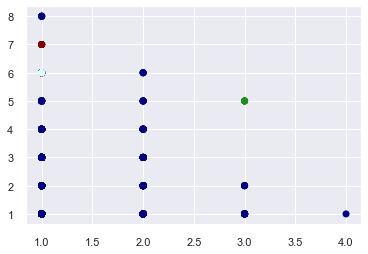

In [101]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(Xdbscan[:,0], Xdbscan[:,1], c=vectorizer(clusters_Dbscan_model))

In [102]:
DBSCAN_TRAIN['DBSCAN']=clusters_Dbscan_model


In [103]:
DBSCAN_TRAIN.DBSCAN.value_counts()

-1     3135
 41       7
 9        6
 32       5
 38       5
 3        5
 25       5
 15       4
 22       4
 5        4
 18       4
 11       4
 37       4
 17       4
 12       4
 16       4
 30       3
 14       3
 10       3
 8        3
 6        3
 20       3
 4        3
 24       3
 2        3
 26       3
 28       3
 40       3
 34       3
 36       3
 35       3
 39       3
 1        3
 7        3
 13       3
 19       3
 21       3
 23       3
 27       3
 29       3
 31       3
 33       3
 0        3
Name: DBSCAN, dtype: int64

In [104]:
DBSCAN_TRAIN.tail()

pl_name  sy_snum  sy_pnum  sy_mnum  pl_orbper  pl_rade  pl_bmasse  \
3280  TRAPPIST-1 d        1        7        0   4.049610    0.772      0.410   
3281  TRAPPIST-1 e        1        7        0   6.099615    0.918      0.620   
3282  TRAPPIST-1 f        1        7        0   9.206690    1.045      0.680   
3283  TRAPPIST-1 g        1        7        0  12.352940    1.127      1.340   
3284  TRAPPIST-1 h        1        7        0  18.767000    0.752      0.331   

      pl_dens  st_teff  st_rad  st_mass  st_met  st_lum  st_logg          ra  \
3280    4.900   2559.0    0.12     0.08    0.04  -3.281     5.28  346.626392   
3281    4.400   2559.0    0.12     0.08    0.04  -3.281     5.28  346.626392   
3282    3.300   2559.0    0.12     0.08    0.04  -3.281     5.28  346.626392   
3283    5.200   2559.0    0.12     0.08    0.04  -3.281     5.28  346.626392   
3284    0.954   2559.0    0.11     0.09    0.04  -3.281     5.28  346.626392   

           dec        sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  \
3280 -5.043462  1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3281 -5.043462  1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3282 -5.043462  1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3283 -5.043462  1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3284 -5.043462  1026.579271    901.0    -492.0     12.1  80.4512     15.0   

      sy_gaiamag  st_nphot  st_nspec  pl_nespec         0         1  DBSCAN  
3280     15.6451         0         0          0 -1.050609  0.281460      41  
3281     15.6451         0         0          0 -0.989384  0.271188      41  
3282     15.6451         0         0          0 -0.914153  0.205410      41  
3283     15.6451         0         0          0 -0.817984  0.318860      41  
3284     15.6451         0         0          0 -0.854222  0.211040      41

In [105]:
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xdbscan, clusters_Dbscan_model))

Silhouette Coefficient: -0.678


In [106]:
metrics.calinski_harabasz_score(Xdbscan,clusters_Dbscan_model)

0.9694142240734173

In [107]:
#TRAIN 
Dbscan_model.fit_predict(Xdb_test)

array([-1], dtype=int64)

In [108]:
# fig, axes = plt.subplots(60,6, figsize=(100,50))
# combs=[(i,j) for j in range(27) for i in range(27) if i!=j]
# for ax in axes.flat:
#     try:
#         comb=combs.pop()
#         ax.scatter(DBSCAN_DF.iloc[:,comb[0]],DBSCAN_DF.iloc[:,comb[1]],c=DBSCAN_DF.DBSCAN,cmap='nipy_spectral_r')
#         ax.set_xlabel(DBSCAN_DF.columns[comb[0]])
#         ax.set_ylabel(DBSCAN_DF.columns[comb[1]])
#     except:
#         break 
# plt.tight_layout()

In [109]:
# fig, axes = plt.subplots(9,3, figsize=(25,50))
# for i,ax in enumerate(axes.flat):
#     try:
#         sns.violinplot(x='DBSCAN',y=DBSCAN_DF.columns[i], data=DBSCAN_DF,ax=ax)
#         ax.set_xlabel('labels')
#         ax.set_ylabel(DBSCAN_DF.columns[i])
#     except:
#         break
        
# plt.tight_layout()

## HDBSCAN

In [110]:
#TRAIN
HDBSCAN_TRAIN=df_normal_train.copy()
Xhdbscan=HDBSCAN_TRAIN.iloc[:,1:]
Xhdbscan=np.array(Xhdbscan)
#TEST
HDBSCAN_TEST=df_normal_test.copy()
XHb_test=HDBSCAN_TEST.iloc[:,1:]
XHb_test=np.array(XHb_test)
#TRAINTESTALL
HDBSCAN_ALL=df_normal_train.append(df_normal_test)
Xhd=HDBSCAN_ALL.iloc[:,1:]
Xhd=np.array(Xhd)

In [111]:
#clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
clusterer=hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None)
clusterer.fit(Xhd)



HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [112]:
HDBSCAN_Labes=clusterer.labels_
HDBSCAN_ALL['HDBSCAN']=clusterer.labels_
HDBSCAN_ALL['HDBSCAN'].value_counts()

 16    2562
-1      587
 12      36
 0        9
 6        8
 2        8
 7        7
 1        7
 13       7
 14       7
 11       7
 10       7
 8        7
 9        6
 4        6
 5        5
 3        5
 15       5
Name: HDBSCAN, dtype: int64

In [113]:
HDBSCAN_ALL.tail()

pl_name  sy_snum  sy_pnum  sy_mnum   pl_orbper  pl_rade  pl_bmasse  \
3281  TRAPPIST-1 e        1        7        0    6.099615    0.918      0.620   
3282  TRAPPIST-1 f        1        7        0    9.206690    1.045      0.680   
3283  TRAPPIST-1 g        1        7        0   12.352940    1.127      1.340   
3284  TRAPPIST-1 h        1        7        0   18.767000    0.752      0.331   
3285         Earth        1        8      174  365.000000    1.000      1.000   

      pl_dens  st_teff  st_rad  st_mass  st_met  st_lum  st_logg          ra  \
3281    4.400   2559.0    0.12     0.08  0.0400  -3.281   5.2800  346.626392   
3282    3.300   2559.0    0.12     0.08  0.0400  -3.281   5.2800  346.626392   
3283    5.200   2559.0    0.12     0.08  0.0400  -3.281   5.2800  346.626392   
3284    0.954   2559.0    0.11     0.09  0.0400  -3.281   5.2800  346.626392   
3285    5.510   5780.0    1.00     1.00  0.0134   1.000   4.4377    0.000000   

           dec          sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  \
3281 -5.043462    1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3282 -5.043462    1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3283 -5.043462    1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3284 -5.043462    1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3285  0.000000  500000.000000      0.0       0.0      0.0   0.0000      0.0   

      sy_gaiamag  st_nphot  st_nspec  pl_nespec         0         1  HDBSCAN  
3281     15.6451         0         0          0 -0.989384  0.271188        2  
3282     15.6451         0         0          0 -0.914153  0.205410        2  
3283     15.6451         0         0          0 -0.817984  0.318860        2  
3284     15.6451         0         0          0 -0.854222  0.211040        2  
3285      0.0000         0         0          0 -0.966799  0.652233       -1

In [114]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xhd,HDBSCAN_Labes))

Silhouette Coefficient: -0.102


In [115]:
metrics.calinski_harabasz_score(Xhd,HDBSCAN_Labes)

12.07960037773273

In [116]:
# test_labels, strengths = hdbscan.approximate_predict(clusterer, XHb_test)
# test_labels

In [117]:
# prediction_data = True
# hdbscan.prediction.approximate_predict(clusterer, XHb_test)


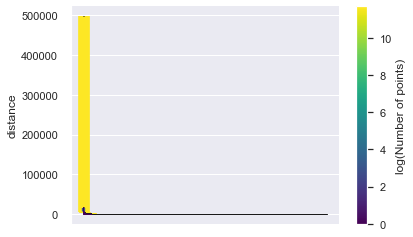

In [118]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

## KMEANS

#### Scaled data

In [119]:
#TRAIN
KMEANS_TRAIN=df_scaled_train.copy()
Xkmeans=KMEANS_TRAIN.copy()
Xkmeans=Xkmeans.iloc[:,1:]
#TEST
KMEANS_TEST=df_scaled_test.copy()
XTkmeans=KMEANS_TEST.copy()
XTkmeans=XTkmeans.iloc[:,1:]

In [120]:
#Initialize variables
scores = []
inertias = []
values = np.arange(2, 15)
for num_clusters in values:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(Xkmeans)
    
    score = metrics.silhouette_score(Xkmeans, kmeans.labels_, metric='euclidean', sample_size=len(Xkmeans))
    
    print('\nNumber of clusters =', num_clusters)
    print('Silhouette score =', score)
    print('Intertia for current cluster = ', kmeans.inertia_)
    scores.append(score)
    inertias.append(kmeans.inertia_)


Number of clusters = 2
Silhouette score = 0.9609004648541357
Intertia for current cluster =  818763.6968889256

Number of clusters = 3
Silhouette score = 0.7754589540065572
Intertia for current cluster =  605199.7820785817

Number of clusters = 4
Silhouette score = 0.6612276413763439
Intertia for current cluster =  479246.11009395274

Number of clusters = 5
Silhouette score = 0.38132398330484707
Intertia for current cluster =  368389.94148783636

Number of clusters = 6
Silhouette score = 0.3892458355922125
Intertia for current cluster =  309249.972701279

Number of clusters = 7
Silhouette score = 0.2874795036128236
Intertia for current cluster =  271939.0918480092

Number of clusters = 8
Silhouette score = 0.2937357378803168
Intertia for current cluster =  240361.52325437506

Number of clusters = 9
Silhouette score = 0.296758783407584
Intertia for current cluster =  217442.77541960357

Number of clusters = 10
Silhouette score = 0.3068346787565268
Intertia for current cluster =  194009

Text(0.5, 1.0, 'Silhouette score vs number of clusters')

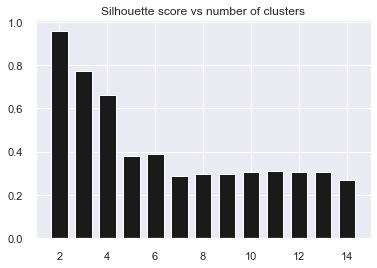

In [121]:
plt.figure()
plt.bar(values, scores, width=0.7, color='k', align='center')
plt.title('Silhouette score vs number of clusters')

In [122]:
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters = ', num_clusters)



Optimal number of clusters =  2


In [123]:
# #Visualize input data
# plt.figure()
# plt.scatter(Xkmeans[:,0], Xkmeans[:,1], color='k', s = 80, marker='o', facecolors='none')
# x_min, x_max = Xkmeans[:, 0].min() -1, Xkmeans[:,0].max()+1
# y_min, y_max = Xkmeans[:,1].min() -1 , Xkmeans[:,1].max()+1
# plt.title('Input data')

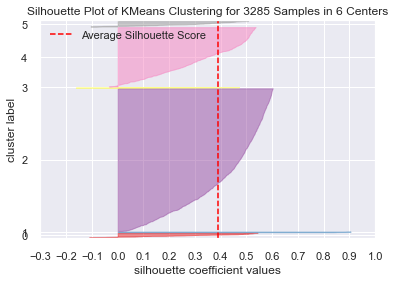

In [124]:
model = SilhouetteVisualizer(KMeans(6))
model.fit(Xkmeans)
model.show()

In [125]:
Xkmeans=np.array(Xkmeans)

In [126]:
kmeans=KMeans(n_clusters=6, init = 'random', max_iter = 1, random_state = 5)
kmeans=kmeans.fit(Xkmeans)
labels = kmeans.labels_
center=kmeans.cluster_centers_

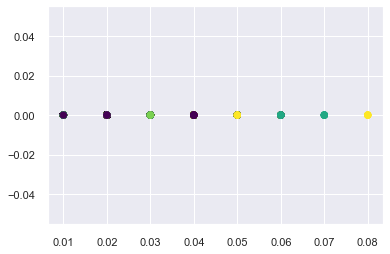

In [127]:
plt.scatter(Xkmeans[:, 1], Xkmeans[:, 2], c=labels, s=40, cmap='viridis');

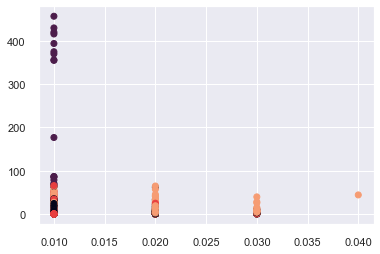

In [128]:
plt.figure('K-means with 5 clusters')
plt.scatter(Xkmeans[:, 0], Xkmeans[:, 5], c=kmeans.labels_)
plt.show()

In [129]:
KMEANS_TRAIN['Kmeans'] =labels
KMEANS_TRAIN.Kmeans.value_counts()

0    1029
4     918
5     777
3     390
2     154
1      17
Name: Kmeans, dtype: int64

In [130]:
# fig, axes = plt.subplots(39,9, figsize=(25,50))
# combs=[(i,j) for j in range(27) for i in range(27) if i!=j]
# for ax in axes.flat:
#     try:
#         comb=combs.pop()
#         ax.scatter(KMEANS_TRAIN.iloc[:,comb[0]],KMEANS_TRAIN.iloc[:,comb[1]],c=KMEANS_TRAIN.kmeans,cmap='nipy_spectral_r')
#         ax.set_xlabel(KMEANS_TRAIN.columns[comb[0]])
#         ax.set_ylabel(KMEANS_TRAIN.columns[comb[1]])
#     except:
#         break 
# plt.tight_layout()

In [131]:
KMEANS_TRAIN.tail()

pl_name  sy_snumScale  sy_pnumScale  sy_mnumScale  pl_orbperScale  \
3280  TRAPPIST-1 d          0.01          0.07           0.0        0.040496   
3281  TRAPPIST-1 e          0.01          0.07           0.0        0.060996   
3282  TRAPPIST-1 f          0.01          0.07           0.0        0.092067   
3283  TRAPPIST-1 g          0.01          0.07           0.0        0.123529   
3284  TRAPPIST-1 h          0.01          0.07           0.0        0.187670   

      pl_radeScale  pl_bmasseScale  pl_densScale  st_teffScale  st_radScale  \
3280       0.00772         0.00410       0.04900         25.59       0.0012   
3281       0.00918         0.00620       0.04400         25.59       0.0012   
3282       0.01045         0.00680       0.03300         25.59       0.0012   
3283       0.01127         0.01340       0.05200         25.59       0.0012   
3284       0.00752         0.00331       0.00954         25.59       0.0011   

      st_massScale  st_metScale  st_lumScale  st_loggScale   raScale  \
3280        0.0008       0.0004     -0.03281        0.0528  3.466264   
3281        0.0008       0.0004     -0.03281        0.0528  3.466264   
3282        0.0008       0.0004     -0.03281        0.0528  3.466264   
3283        0.0008       0.0004     -0.03281        0.0528  3.466264   
3284        0.0009       0.0004     -0.03281        0.0528  3.466264   

      decScale  sy_pmScale  sy_pmraScale  sy_pmdecScale  sy_distScale  \
3280 -0.050435   10.265793          9.01          -4.92         0.121   
3281 -0.050435   10.265793          9.01          -4.92         0.121   
3282 -0.050435   10.265793          9.01          -4.92         0.121   
3283 -0.050435   10.265793          9.01          -4.92         0.121   
3284 -0.050435   10.265793          9.01          -4.92         0.121   

      sy_plxScale  sy_bmagScale  sy_gaiamagScale  st_nphotScale  \
3280     0.804512          0.15         0.156451            0.0   
3281     0.804512          0.15         0.156451            0.0   
3282     0.804512          0.15         0.156451            0.0   
3283     0.804512          0.15         0.156451            0.0   
3284     0.804512          0.15         0.156451            0.0   

      st_nspecScale  pl_nespecScale         0         1  Kmeans  
3280            0.0             0.0 -1.050609  0.281460       3  
3281            0.0             0.0 -0.989384  0.271188       3  
3282            0.0             0.0 -0.914153  0.205410       3  
3283            0.0             0.0 -0.817984  0.318860       3  
3284            0.0             0.0 -0.854222  0.211040       3

In [132]:
KMEANS_TRAIN[KMEANS_TRAIN['Kmeans']==3]

pl_name  sy_snumScale  sy_pnumScale  sy_mnumScale  \
1                11 UMi b          0.01          0.01           0.0   
10                4 UMa b          0.01          0.01           0.0   
11               42 Dra b          0.02          0.01           0.0   
32               91 Aqr b          0.03          0.01           0.0   
33           BD+03 2562 b          0.01          0.01           0.0   
38           BD+20 2457 c          0.01          0.02           0.0   
39            BD+20 274 b          0.01          0.01           0.0   
41            BD+48 738 b          0.01          0.01           0.0   
46           BD-11 4672 b          0.01          0.02           0.0   
47           BD-11 4672 c          0.01          0.02           0.0   
79       EPIC 211822797 b          0.01          0.01           0.0   
89               G 9-40 b          0.01          0.01           0.0   
90               GJ 143 b          0.01          0.02           0.0   
91              GJ 15 A b          0.02          0.02           0.0   
92              GJ 15 A c          0.02          0.02           0.0   
93               GJ 179 b          0.01          0.01           0.0   
95             GJ 338 B b          0.02          0.01           0.0   
96              GJ 3470 b          0.01          0.01           0.0   
97               GJ 357 b          0.01          0.03           0.0   
98               GJ 357 c          0.01          0.03           0.0   
99               GJ 357 d          0.01          0.03           0.0   
100             GJ 3942 b          0.01          0.01           0.0   
101             GJ 3998 b          0.01          0.02           0.0   
102             GJ 3998 c          0.01          0.02           0.0   
103             GJ 4276 b          0.01          0.01           0.0   
104              GJ 433 b          0.01          0.03           0.0   
105              GJ 436 b          0.01          0.01           0.0   
106              GJ 536 b          0.01          0.01           0.0   
107              GJ 581 b          0.01          0.03           0.0   
108              GJ 625 b          0.01          0.01           0.0   
109            GJ 676 A b          0.02          0.04           0.0   
110              GJ 685 b          0.01          0.01           0.0   
111              GJ 687 b          0.01          0.02           0.0   
112              GJ 832 b          0.01          0.02           0.0   
113              GJ 849 b          0.01          0.01           0.0   
115              GJ 876 b          0.01          0.04           0.0   
116              GJ 876 c          0.01          0.04           0.0   
117              GJ 876 d          0.01          0.04           0.0   
118             GJ 9827 b          0.01          0.03           0.0   
119             GJ 9827 c          0.01          0.03           0.0   
120             GJ 9827 d          0.01          0.03           0.0   
121               Gl 49 b          0.02          0.01           0.0   
122              Gl 686 b          0.01          0.01           0.0   
124            HAT-P-12 b          0.01          0.01           0.0   
135            HAT-P-20 b          0.01          0.01           0.0   
165            HAT-P-54 b          0.01          0.01           0.0   
214             HATS-47 b          0.01          0.01           0.0   
215           HATS-48 A b          0.02          0.01           0.0   
216             HATS-49 b          0.01          0.01           0.0   
224              HATS-6 b          0.01          0.01           0.0   
237             HATS-72 b          0.01          0.01           0.0   
273           HD 110014 b          0.01          0.01           0.0   
277           HD 113538 b          0.01          0.02           0.0   
278           HD 113538 c          0.01          0.02           0.0   
279           HD 113996 b          0.02          0.01           0.0   
289            HD 11755 b          0.01   

In [133]:
y_pred = kmeans.predict(XTkmeans)
label=y_pred
label

array([3])

In [134]:
KMEANS_TEST['Kmeans']=label
KMEANS_TEST.head()

pl_name  sy_snumScale  sy_pnumScale  sy_mnumScale  pl_orbperScale  \
3285   Earth          0.01          0.08          1.74            3.65   

      pl_radeScale  pl_bmasseScale  pl_densScale  st_teffScale  st_radScale  \
3285          0.01            0.01        0.0551          57.8         0.01   

      st_massScale  st_metScale  st_lumScale  st_loggScale  raScale  decScale  \
3285          0.01     0.000134         0.01      0.044377      0.0       0.0   

      sy_pmScale  sy_pmraScale  sy_pmdecScale  sy_distScale  sy_plxScale  \
3285      5000.0           0.0            0.0           0.0          0.0   

      sy_bmagScale  sy_gaiamagScale  st_nphotScale  st_nspecScale  \
3285           0.0              0.0            0.0            0.0   

      pl_nespecScale         0         1  Kmeans  
3285             0.0 -0.966799  0.652233       3

In [135]:
KMEANS_TRAIN=KMEANS_TRAIN.append(KMEANS_TEST)

In [136]:
KMEANS_TRAIN.tail(2)

pl_name  sy_snumScale  sy_pnumScale  sy_mnumScale  pl_orbperScale  \
3284  TRAPPIST-1 h          0.01          0.07          0.00         0.18767   
3285         Earth          0.01          0.08          1.74         3.65000   

      pl_radeScale  pl_bmasseScale  pl_densScale  st_teffScale  st_radScale  \
3284       0.00752         0.00331       0.00954         25.59       0.0011   
3285       0.01000         0.01000       0.05510         57.80       0.0100   

      st_massScale  st_metScale  st_lumScale  st_loggScale   raScale  \
3284        0.0009     0.000400     -0.03281      0.052800  3.466264   
3285        0.0100     0.000134      0.01000      0.044377  0.000000   

      decScale   sy_pmScale  sy_pmraScale  sy_pmdecScale  sy_distScale  \
3284 -0.050435    10.265793          9.01          -4.92         0.121   
3285  0.000000  5000.000000          0.00           0.00         0.000   

      sy_plxScale  sy_bmagScale  sy_gaiamagScale  st_nphotScale  \
3284     0.804512          0.15         0.156451            0.0   
3285     0.000000          0.00         0.000000            0.0   

      st_nspecScale  pl_nespecScale         0         1  Kmeans  
3284            0.0             0.0 -0.854222  0.211040       3  
3285            0.0             0.0 -0.966799  0.652233       3

In [137]:

kmeans.inertia_

1223080.1951902707

In [138]:
center=kmeans.cluster_centers_

In [139]:
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(Xkmeans,labels))

Silhouette Coefficient: 0.161


In [140]:
metrics.calinski_harabasz_score(Xkmeans,labels)

873.9291047483393

#### Aglomerative Clustering

In [141]:
#TRAIN
AG_TRAIN=df_scaled_train.copy()
Xag=AG_TRAIN.copy()
Xag=Xag.iloc[:,1:]
#TEST
AG_TEST=df_scaled_test.copy()
XTag=AG_TEST.copy()
XTag=XTag.iloc[:,1:]
#TRAINTESTALL
AG_ALL=df_normal_train.append(df_normal_test)
Xall=AG_ALL.iloc[:,1:]
Xall=np.array(Xall)

In [142]:
#Initialize variables
scores = []
inertias = []
values = np.arange(2, 15)
for num_clusters in values:
    single = cluster.AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', affinity='euclidean')
    single.fit(Xag)
    
    score = metrics.silhouette_score(Xag, single.labels_, metric='euclidean', sample_size=len(Xag))
    
    print('\nNumber of clusters =', num_clusters)
    print('Silhouette score =', score)
    #print('Intertia for current cluster = ', single.inertia_)
    scores.append(score)
    #inertias.append(single.inertia_)


Number of clusters = 2
Silhouette score = 0.9609004648541357

Number of clusters = 3
Silhouette score = 0.6981273996319276

Number of clusters = 4
Silhouette score = 0.668964928467319

Number of clusters = 5
Silhouette score = 0.4098782798321674

Number of clusters = 6
Silhouette score = 0.41774256903668733

Number of clusters = 7
Silhouette score = 0.26808736388351184

Number of clusters = 8
Silhouette score = 0.27168055826447535

Number of clusters = 9
Silhouette score = 0.2880295370967219

Number of clusters = 10
Silhouette score = 0.2883267672050964

Number of clusters = 11
Silhouette score = 0.31060005431108967

Number of clusters = 12
Silhouette score = 0.3103561675400985

Number of clusters = 13
Silhouette score = 0.2695860956848603

Number of clusters = 14
Silhouette score = 0.25025194027232406


Text(0.5, 1.0, 'Silhouette score vs number of clusters')

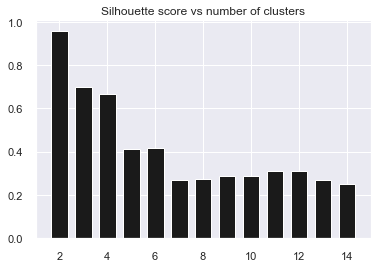

In [143]:
plt.figure()
plt.bar(values, scores, width=0.7, color='k', align='center')
plt.title('Silhouette score vs number of clusters')

In [144]:
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters = ', num_clusters)


Optimal number of clusters =  2


In [145]:
single = cluster.AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean')
single=single.fit(Xall)
AGlabels=single.labels_

In [146]:
AG_ALL['AGC']=AGlabels

In [147]:
AG_ALL.AGC.value_counts()

1    2764
5     352
0     152
2       9
4       8
3       1
Name: AGC, dtype: int64

In [148]:
AG_ALL.tail(3)

pl_name  sy_snum  sy_pnum  sy_mnum  pl_orbper  pl_rade  pl_bmasse  \
3283  TRAPPIST-1 g        1        7        0   12.35294    1.127      1.340   
3284  TRAPPIST-1 h        1        7        0   18.76700    0.752      0.331   
3285         Earth        1        8      174  365.00000    1.000      1.000   

      pl_dens  st_teff  st_rad  st_mass  st_met  st_lum  st_logg          ra  \
3283    5.200   2559.0    0.12     0.08  0.0400  -3.281   5.2800  346.626392   
3284    0.954   2559.0    0.11     0.09  0.0400  -3.281   5.2800  346.626392   
3285    5.510   5780.0    1.00     1.00  0.0134   1.000   4.4377    0.000000   

           dec          sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  \
3283 -5.043462    1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3284 -5.043462    1026.579271    901.0    -492.0     12.1  80.4512     15.0   
3285  0.000000  500000.000000      0.0       0.0      0.0   0.0000      0.0   

      sy_gaiamag  st_nphot  st_nspec  pl_nespec         0         1  AGC  
3283     15.6451         0         0          0 -0.817984  0.318860    5  
3284     15.6451         0         0          0 -0.854222  0.211040    5  
3285      0.0000         0         0          0 -0.966799  0.652233    3

In [149]:
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(Xall,AGlabels))

Silhouette Coefficient: 0.413


In [150]:
metrics.calinski_harabasz_score(Xall,AGlabels)

43982.74762524516

# STATISTIC

In [151]:
Exoplanets_st=Exoplanets_all.copy()

In [152]:
KMEANS=KMEANS_TRAIN.Kmeans
AGLABELS=AG_ALL.AGC

In [153]:
Exoplanets_st['Kmeans_lb']=KMEANS
Exoplanets_st['AG']=AGLABELS

In [154]:
Exoplanets_st.tail()

pl_name    hostname pl_letter  sy_snum  sy_pnum  sy_mnum  \
3281  TRAPPIST-1 e  TRAPPIST-1         e        1        7        0   
3282  TRAPPIST-1 f  TRAPPIST-1         f        1        7        0   
3283  TRAPPIST-1 g  TRAPPIST-1         g        1        7        0   
3284  TRAPPIST-1 h  TRAPPIST-1         h        1        7        0   
3285         Earth         Sun         d        1        8      174   

      disc_year   pl_orbper  pl_rade  pl_bmasse  pl_dens  ttv_flag  st_teff  \
3281       2017    6.099615    0.918      0.620    4.400         1   2559.0   
3282       2017    9.206690    1.045      0.680    3.300         1   2559.0   
3283       2017   12.352940    1.127      1.340    5.200         1   2559.0   
3284       2017   18.767000    0.752      0.331    0.954         1   2559.0   
3285          0  365.000000    1.000      1.000    5.510         1   5780.0   

      st_rad  st_mass  st_met  st_lum  st_logg          ra       dec  \
3281    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
3282    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
3283    0.12     0.08  0.0400  -3.281   5.2800  346.626392 -5.043462   
3284    0.11     0.09  0.0400  -3.281   5.2800  346.626392 -5.043462   
3285    1.00     1.00  0.0134   1.000   4.4377    0.000000  0.000000   

              sy_pm  sy_pmra  sy_pmdec  sy_dist   sy_plx  sy_bmag  sy_gaiamag  \
3281    1026.579271    901.0    -492.0     12.1  80.4512     15.0     15.6451   
3282    1026.579271    901.0    -492.0     12.1  80.4512     15.0     15.6451   
3283    1026.579271    901.0    -492.0     12.1  80.4512     15.0     15.6451   
3284    1026.579271    901.0    -492.0     12.1  80.4512     15.0     15.6451   
3285  500000.000000      0.0       0.0      0.0   0.0000      0.0      0.0000   

      st_nphot  st_nspec  pl_nespec  cb_flag_y  rv_flag  pul_flag  ptv_flag  \
3281         0         0          0          0        0         0         0   
3282         0         0          0          0        0         0         0   
3283         0         0          0          0        0         0         0   
3284         0         0          0          0        0         0         0   
3285         0         0          0          0        0         0         0   

      tran_flag  ast_flag  obm_flag  etv_flag  dkin_flag  [M/H]  c  d  e  f  \
3281          1         0         0         0          0      0  0  0  1  0   
3282          1         0         0         0          0      0  0  0  0  1   
3283          1         0         0         0          0      0  0  0  0  0   
3284          1         0         0         0          0      0  0  0  0  0   
3285          1         1         1         0          0      0  0  1  0  0   

      g  h  Kmeans_lb  AG  
3281  0  0          3   5  
3282  0  0          3   5  
3283  1  0          3   5  
3284  0  1          3   5  
3285  0  0          3   3

In [155]:
#Exoplanets_st.Kmeans_lb.value_counts()

In [156]:
Exoplanets_st.AG.value_counts()

1    2764
5     352
0     152
2       9
4       8
3       1
Name: AG, dtype: int64

In [157]:
Exoplanets_st.groupby('AG').mean()

sy_snum   sy_pnum  sy_mnum    disc_year     pl_orbper    pl_rade  \
AG                                                                      
0   1.276316  1.394737      0.0  2010.184211   1677.608504  12.598092   
1   1.089725  1.750362      0.0  2014.304993     98.234967   5.290435   
2   1.000000  1.000000      0.0  2016.000000      5.475468  15.897778   
3   1.000000  8.000000    174.0     0.000000    365.000000   1.000000   
4   1.375000  1.875000      0.0  2015.125000  14906.612500  12.801875   
5   1.102273  2.164773      0.0  2015.463068     19.149496   2.682696   

       pl_bmasse    pl_dens  ttv_flag      st_teff    st_rad   st_mass  \
AG                                                                       
0    2861.836902   8.270974  0.019737  5295.510658  9.156974  1.684605   
1     124.150548   3.965938  0.082851  5654.382406  1.271961  1.034132   
2   39700.000000  55.077778  0.000000  6352.000000  1.444444  1.274444   
3       1.000000   5.510000  1.000000  5780.000000  1.000000  1.000000   
4    3147.706212   9.272500  0.000000  6069.500000  1.282500  1.180000   
5      24.381892   5.516324  0.125000  4049.657244  0.613778  0.578295   

      st_met    st_lum   st_logg          ra        dec          sy_pm  \
AG                                                                       
0   0.018618  0.838605  3.569211  176.215244   7.244205     146.508126   
1   0.031763  0.071486  4.351758  255.322069  28.874293      47.953264   
2   0.049444  0.487556  4.241111  289.489884  38.076887       8.882966   
3   0.013400  1.000000  4.437700    0.000000   0.000000  500000.000000   
4   0.025375  0.261250  4.255000  144.883785  -5.634098     199.832888   
5  -0.081616 -1.145790  4.718750  243.667936  24.355929     143.050803   

      sy_pmra   sy_pmdec      sy_dist     sy_plx    sy_bmag  sy_gaiamag  \
AG                                                                        
0    2.270119 -42.657697   227.437985  17.863965   8.903724    7.728084   
1    0.853973 -17.021783   678.433456   5.758925  13.833543   12.893348   
2   -0.605931  -6.709649  1230.132333   0.809813  15.227889   14.418756   
3    0.000000   0.000000     0.000000   0.000000   0.000000    0.000000   
4  -62.741763 -68.033038    36.189288  32.012750   7.447000    6.706469   
5   34.747602 -64.530865   219.938446  18.555843  15.720122   13.751121   

    st_nphot  st_nspec  pl_nespec  cb_flag_y   rv_flag  pul_flag  ptv_flag  \
AG                                                                           
0   0.934211  0.552632   0.434211   0.006579  0.993421       0.0       0.0   
1   0.398698  0.170043   0.154124   0.002894  0.313676       0.0       0.0   
2   0.000000  0.000000   0.000000   0.000000  0.000000       0.0       0.0   
3   0.000000  0.000000   0.000000   0.000000  0.000000       0.0       0.0   
4   1.000000  0.625000   0.000000   0.000000  0.750000       0.0       0.0   
5   0.321023  0.215909   0.093750   0.002841  0.215909       0.0       0.0   

    tran_flag  ast_flag  obm_flag  etv_flag  dkin_flag     [M/H]         c  \
AG                                                                           
0    0.105263  0.006579  0.006579       0.0        0.0  0.092105  0.184211   
1    0.871925  0.000000  0.007236       0.0        0.0  0.126266  0.158828   
2    1.000000  0.000000  0.000000       0.0        0.0  0.000000  0.000000   
3    1.000000  1.000000  1.000000       0.0        0.0  0.000000  0.000000   
4    0.000000  0.250000  0.000000       0.0        0.0  0.375000  0.250000   
5    0.923295  0.000000  0.000000       0.0        0.0  0.119318  0.204545   

           d         e         f         g         h  Kmeans_lb  
AG                                                               
0   0.019737  0.006579  0.000000  0.006579  0.000000   2.565789  
1   0.054269  0.018090  0.005065  0.001809  0.000724   2.754342  
2   0.000000  0.000000  0.000000  0.000000  0.000000   1.000000  
3   1.000000  0.000000  0.000000  0.000000  0.000000 

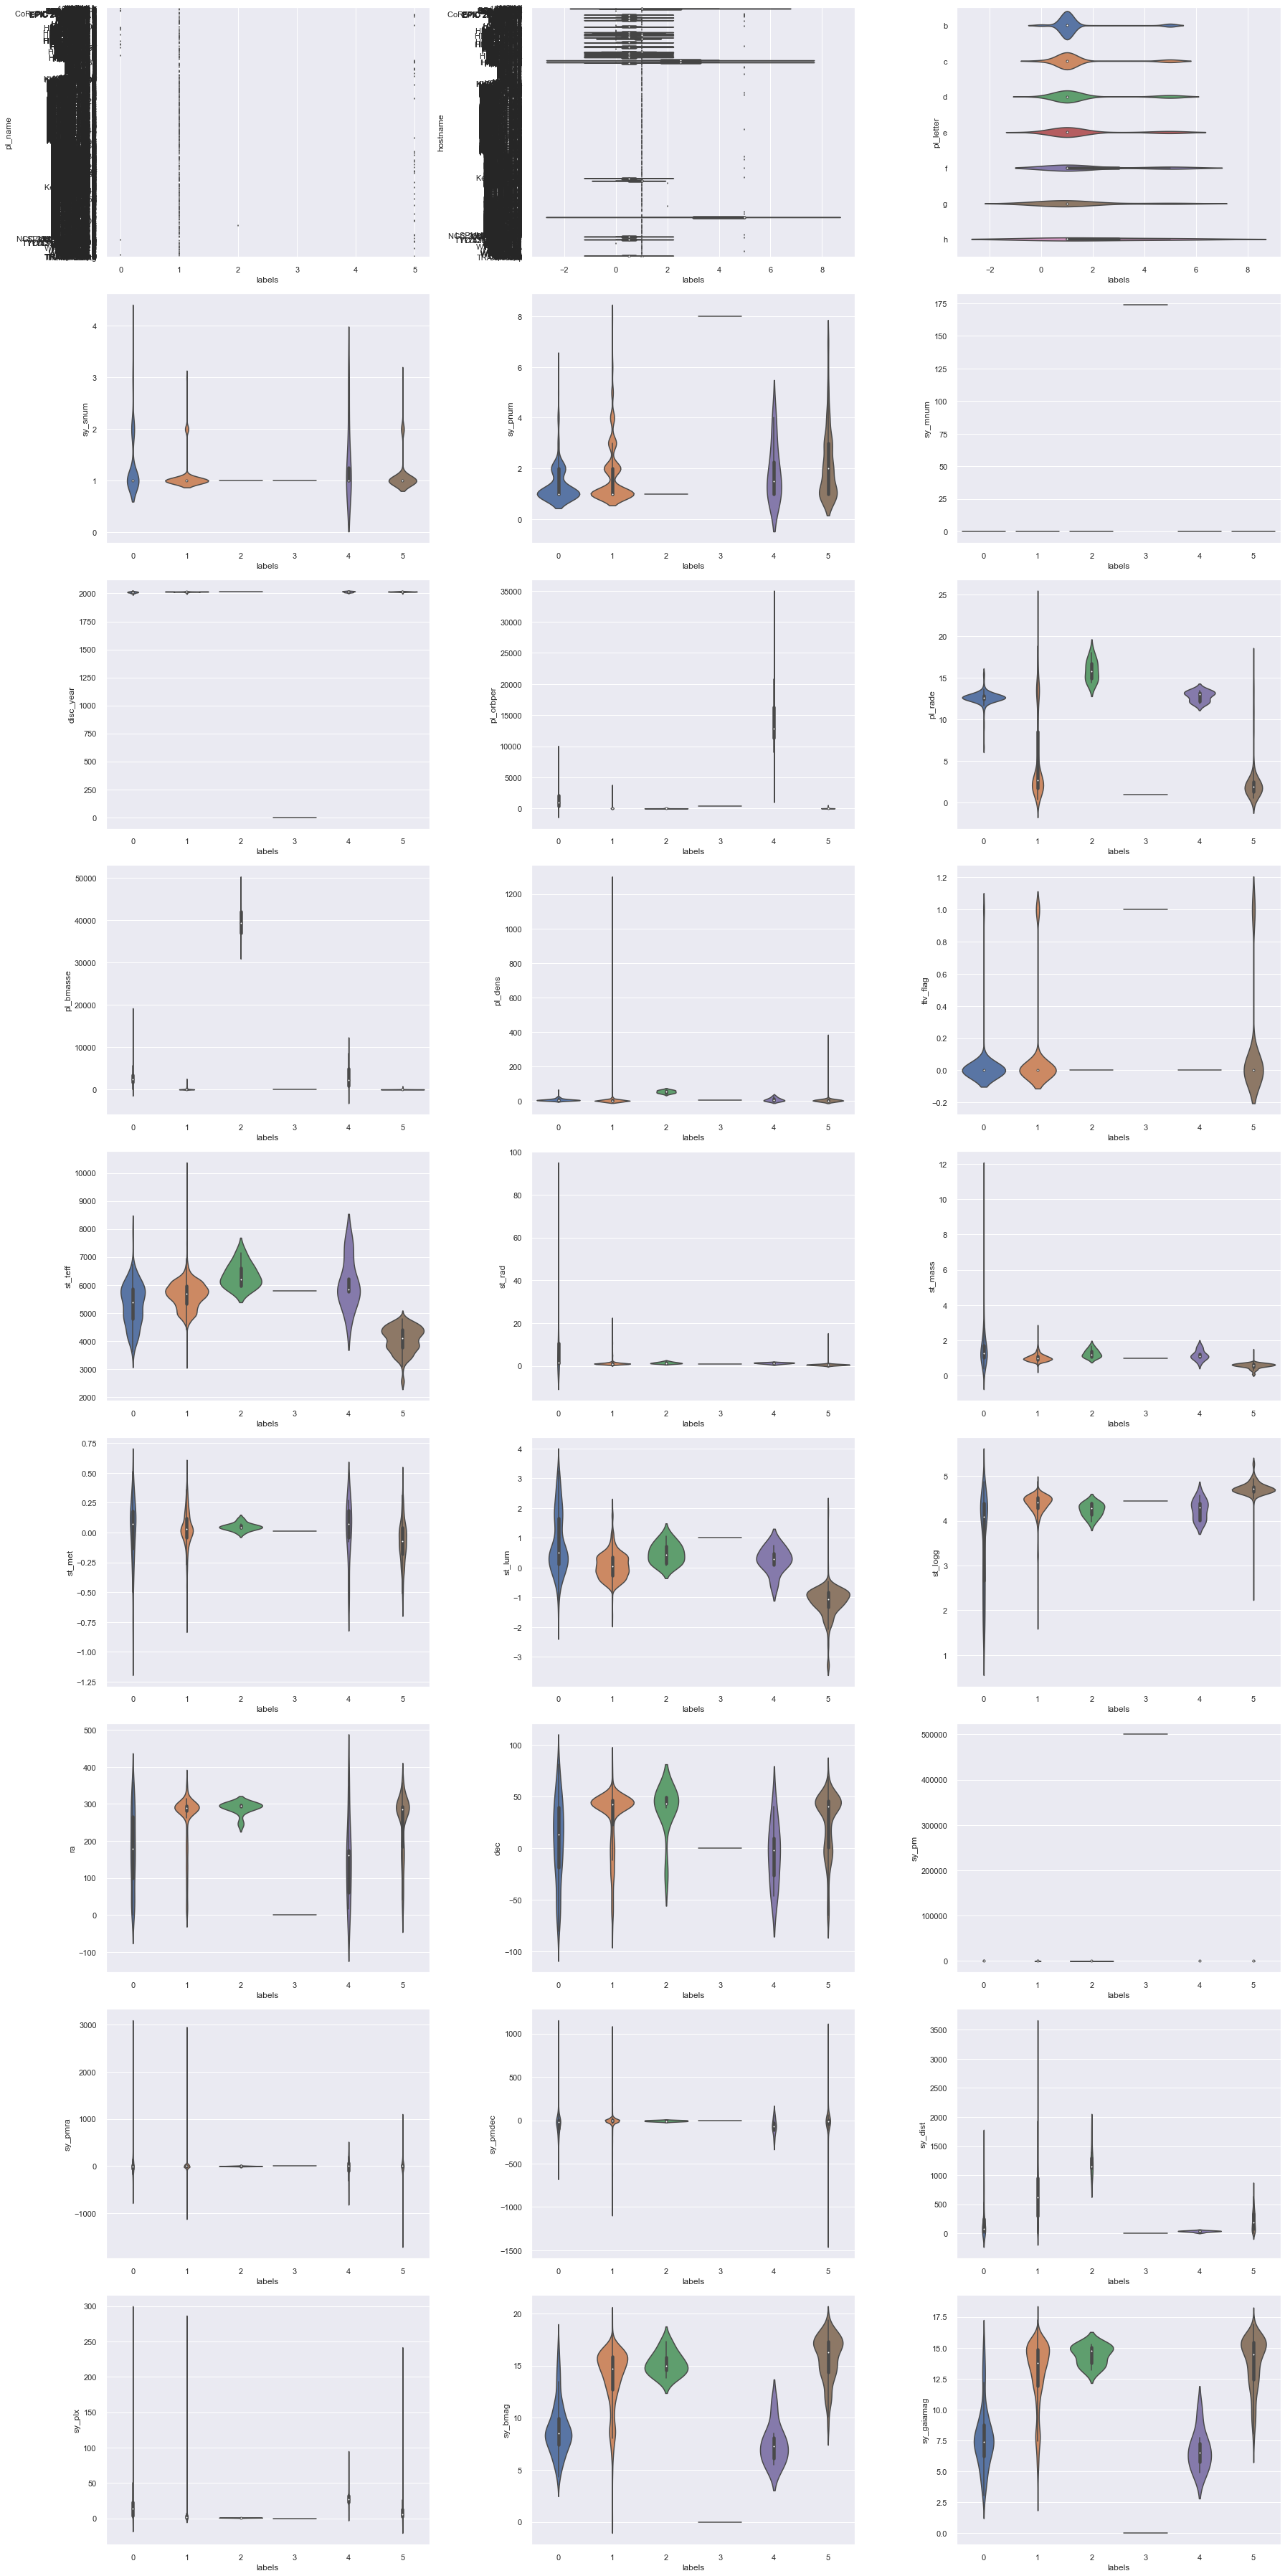

In [158]:
fig, axes = plt.subplots(9,3, figsize=(25,50))
for i,ax in enumerate(axes.flat):
    try:
        sns.violinplot(x='AG',y=Exoplanets_st.columns[i], data=Exoplanets_st,ax=ax)
        ax.set_xlabel('labels')
        ax.set_ylabel(Exoplanets_st.columns[i])
    except:
        break
        
plt.tight_layout()

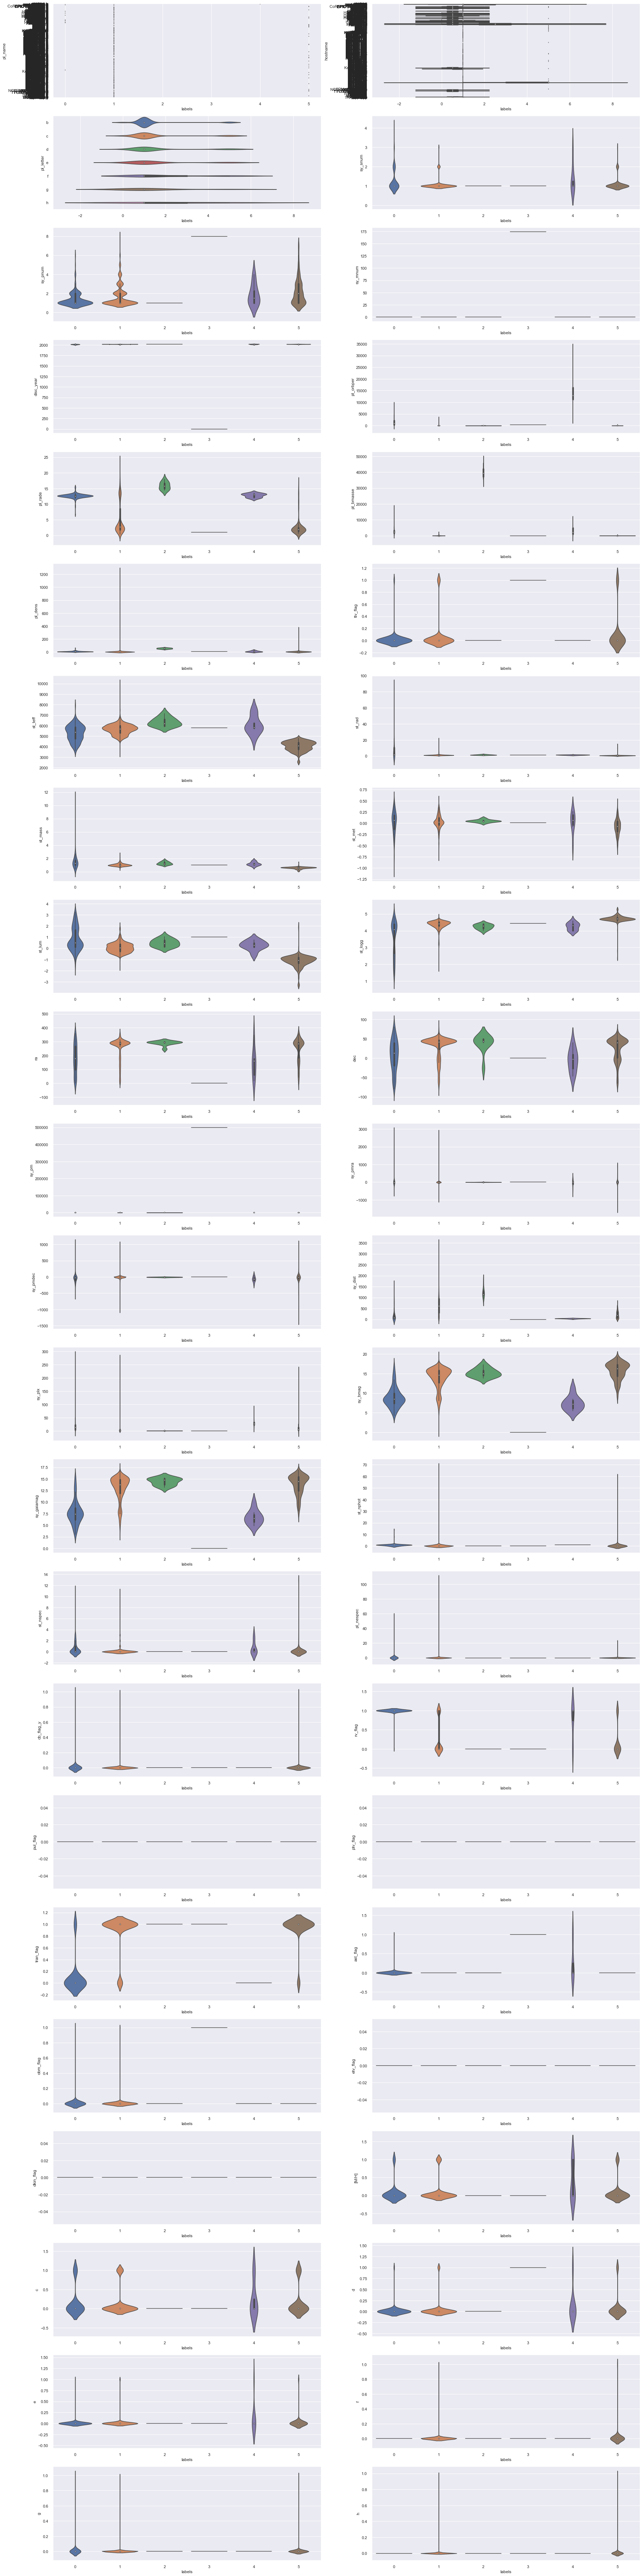

In [159]:
fig, axes = plt.subplots(23,2, figsize=(25,100))
for i,ax in enumerate(axes.flat):
    try:
        sns.violinplot(x='AG',y=Exoplanets_st.columns[i], data=Exoplanets_st,ax=ax)
        ax.set_xlabel('labels')
        ax.set_ylabel(Exoplanets_st.columns[i])
    except:
        break
        
plt.tight_layout()

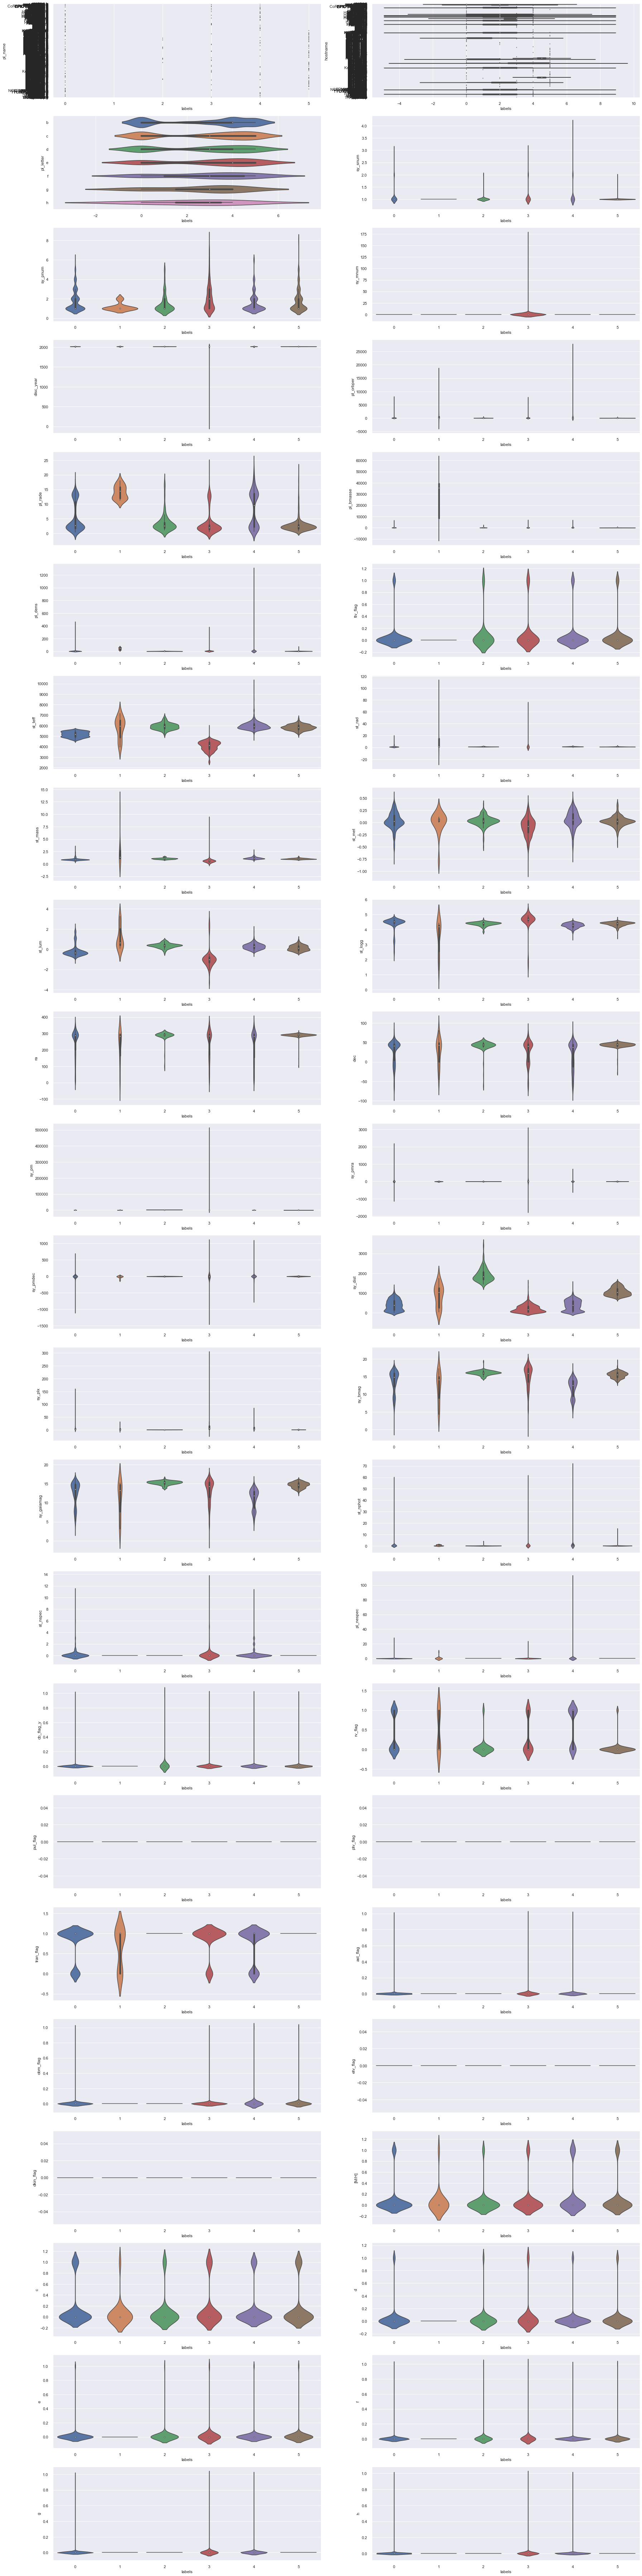

In [161]:
fig, axes = plt.subplots(23,2, figsize=(25,100))
for i,ax in enumerate(axes.flat):
    try:
        sns.violinplot(x='Kmeans_lb',y=Exoplanets_st.columns[i], data=Exoplanets_st,ax=ax)
        ax.set_xlabel('labels')
        ax.set_ylabel(Exoplanets_st.columns[i])
    except:
        break
        
plt.tight_layout()

In [162]:
Exoplanets_st.columns

Index(['pl_name', 'hostname', 'pl_letter', 'sy_snum', 'sy_pnum', 'sy_mnum',
       'disc_year', 'pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_dens', 'ttv_flag',
       'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_lum', 'st_logg', 'ra',
       'dec', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'sy_bmag',
       'sy_gaiamag', 'st_nphot', 'st_nspec', 'pl_nespec', 'cb_flag_y',
       'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag',
       'etv_flag', 'dkin_flag', '[M/H]', 'c', 'd', 'e', 'f', 'g', 'h',
       'Kmeans_lb', 'AG'],
      dtype='object')

In [163]:
Exoplanets_st.shape

(3286, 48)

In [164]:
Exoplanets=Exoplanets_st[(Exoplanets_st['AG'] ==0)|(Exoplanets_st['AG'] ==5)|(Exoplanets_st['AG'] ==3)]

In [165]:
Exoplanets.AG.value_counts()

5    352
0    152
3      1
Name: AG, dtype: int64

In [166]:
Exoplanets.shape

(505, 48)

## PCA

In [168]:
AG_ALL.columns

Index([   'pl_name',    'sy_snum',    'sy_pnum',    'sy_mnum',  'pl_orbper',
          'pl_rade',  'pl_bmasse',    'pl_dens',    'st_teff',     'st_rad',
          'st_mass',     'st_met',     'st_lum',    'st_logg',         'ra',
              'dec',      'sy_pm',    'sy_pmra',   'sy_pmdec',    'sy_dist',
           'sy_plx',    'sy_bmag', 'sy_gaiamag',   'st_nphot',   'st_nspec',
        'pl_nespec',            0,            1,        'AGC'],
      dtype='object')

In [169]:
AGPCA=AG_ALL[(AG_ALL['AGC'] ==0)|(AG_ALL['AGC'] ==5)|(AG_ALL['AGC'] ==3)]

In [170]:
AGPCA.head()

pl_name  sy_snum  sy_pnum  sy_mnum  pl_orbper  pl_rade  pl_bmasse  \
0     11 Com b        2        1        0  326.03000     12.1  6165.6000   
1     11 UMi b        1        1        0  516.21997     12.3  4684.8142   
5     18 Del b        2        1        0  993.30000     12.5  3273.5000   
9   30 Ari B b        4        1        0  335.10001     12.3  4392.4106   
10     4 UMa b        1        1        0  269.30000     12.7  2256.5000   

    pl_dens  st_teff  st_rad  st_mass  st_met  st_lum  st_logg          ra  \
0     19.10   4742.0   19.00     2.70  -0.350   2.243     2.31  185.178779   
1     13.80   4213.0   29.79     2.78  -0.020   2.400     1.93  229.274595   
5      9.21   4979.0    8.50     2.30  -0.052   1.602     2.82  314.607838   
9     13.00   6331.0    1.41     1.93   0.190   0.460     4.43   39.241274   
10     6.05   4415.0   18.11     1.23  -0.250   2.050     1.80  130.052810   

          dec       sy_pm    sy_pmra  sy_pmdec   sy_dist    sy_plx  sy_bmag  \
0   17.793252  140.383627 -109.24100   88.1701   93.1846  10.71040    5.726   
1   71.823943   10.679019    3.42996   10.1132  125.3210   7.95388    6.382   
5   10.839138   60.603853  -50.03350  -34.1976   76.2220  13.09220    6.430   
9   24.648010  141.813532  141.41100  -10.6774   44.6570  22.36410    7.458   
10  64.328050   66.657138  -61.22270   26.3620   73.4603  13.59010    5.770   

    sy_gaiamag  st_nphot  st_nspec  pl_nespec         0         1  AGC  
0      4.44038         1         0          0  0.623171  0.273853    0  
1      4.56216         1         0          0  0.623171  0.273853    0  
5      5.27476         1         0          0  0.623171  0.273853    0  
9      6.96085         1         0          0  0.623171  0.273853    0  
10     4.23773         1         0          0  0.623171  0.273853    0

In [171]:
AGPCA.shape

(505, 29)

In [172]:
# Separating out the target
y = AGPCA.iloc[:,28:]

In [173]:
y.tail(2)


AGC
3284    5
3285    3

In [174]:
X=AGPCA.iloc[:,1:28]
X.columns

Index([   'sy_snum',    'sy_pnum',    'sy_mnum',  'pl_orbper',    'pl_rade',
        'pl_bmasse',    'pl_dens',    'st_teff',     'st_rad',    'st_mass',
           'st_met',     'st_lum',    'st_logg',         'ra',        'dec',
            'sy_pm',    'sy_pmra',   'sy_pmdec',    'sy_dist',     'sy_plx',
          'sy_bmag', 'sy_gaiamag',   'st_nphot',   'st_nspec',  'pl_nespec',
                  0,            1],
      dtype='object')

In [175]:
X_scaled = StandardScaler().fit_transform(X)


In [176]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [177]:
finalDf = pd.concat([principalDf, AGPCA.AGC],axis=1)

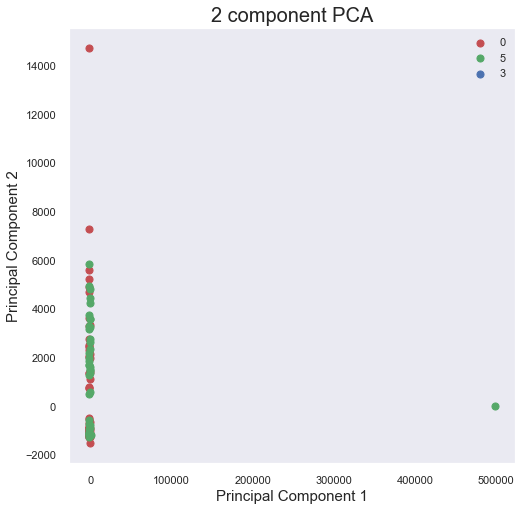

In [178]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,5,3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['AGC'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  

D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Data-Ironhack\Apps\ANACONDA\lib

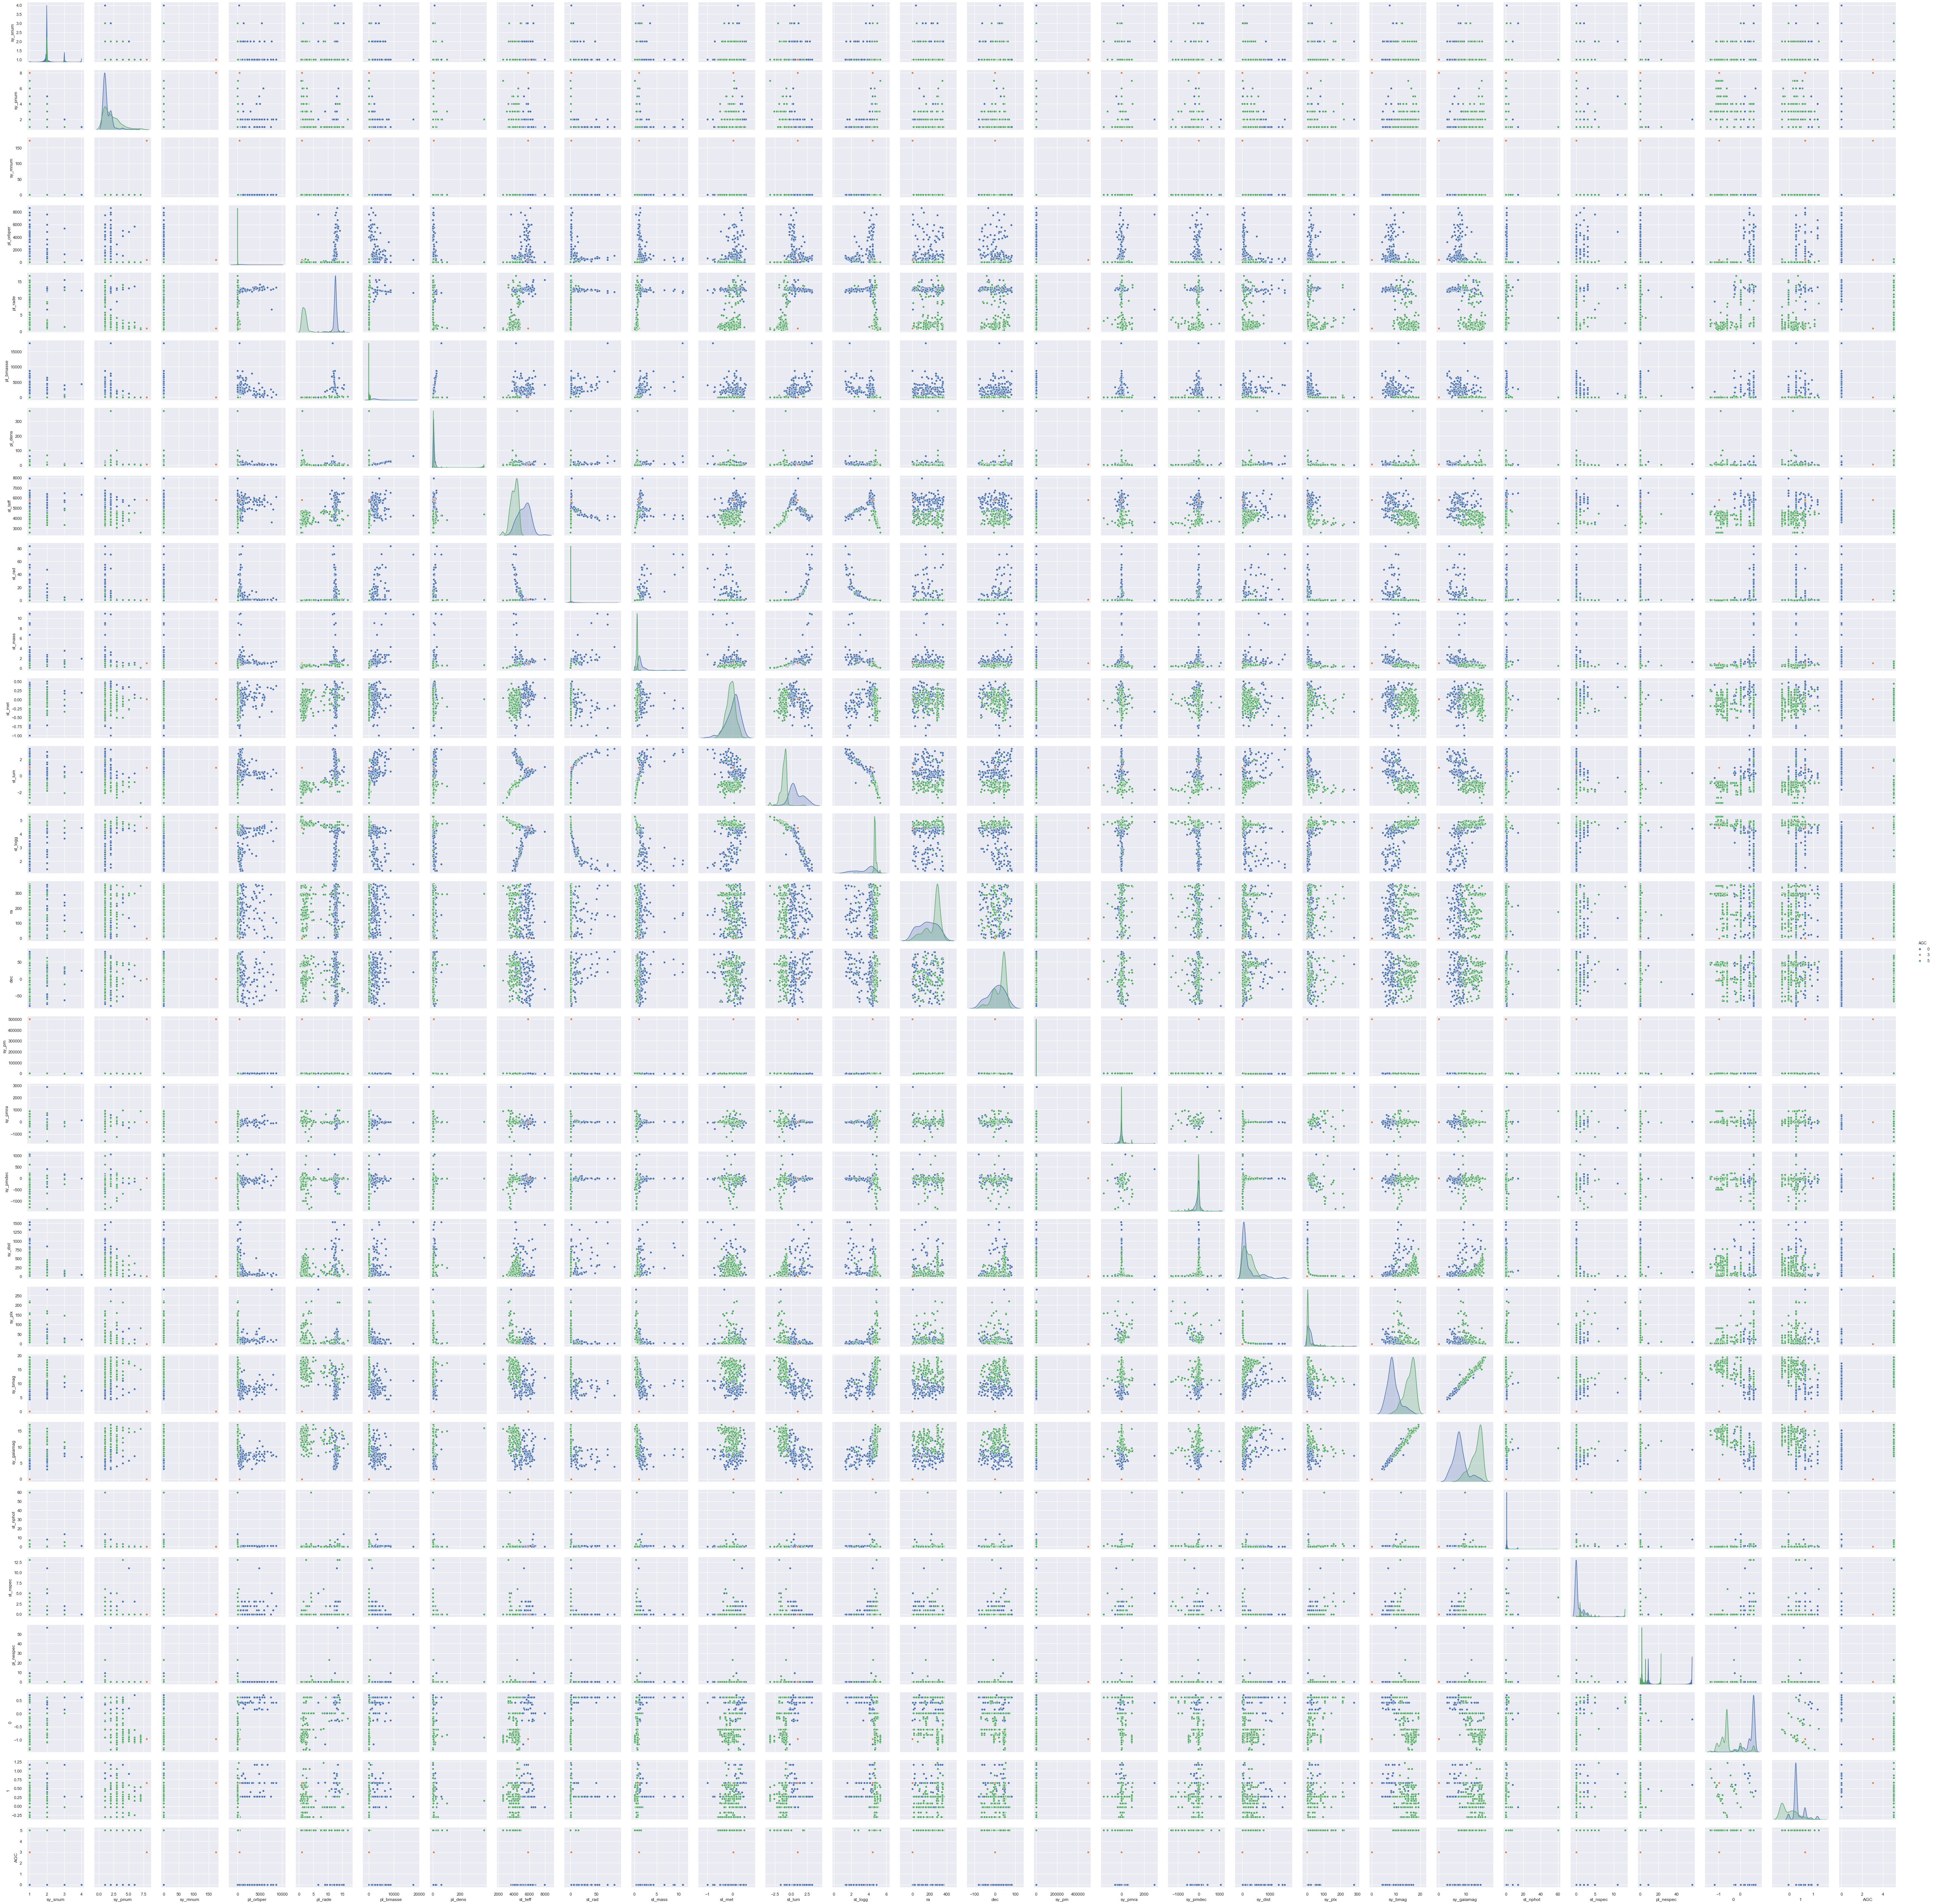

In [179]:

sns.pairplot(AGPCA,hue='AGC')